In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time, strftime, localtime

In [2]:
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.integrate import quad
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
import emcee
import corner

In [3]:
path = "/home/bruno/Documents/COSMOamautas/Data/Bootes/"

In [4]:
m = np.arange(7,12.4,0.2)

def SchreiberMS(m1,z): ## For plotting Schreiber+15 main sequence
    return m1-9 - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m1-9 - 0.36-2.5*np.log10(1+z),0.))**2

def SpeagleMS(m1,z): ## For plotting Speagle+14 main sequence:
    age = cosmo.age(z).value
    return (0.84-0.026*age)*m1-6.51+0.11*age

def CarnallQ(m1,z): ## For plotting Carnall+20 sSFR quiescent limit:
    age = cosmo.age(z).value
    return m1+np.log10(0.2/age)-9

In [5]:
results = pd.read_csv(path+"Results/Bootes_full_results_NDWFS_6.csv")
results

,Type,Detections,Redshift_range,Median_redshift,Mass_range,Median_mass,Count,IR_detected,Radio_detected,IRRadio_detected,...,100_flux(mJy),100_std(mJy),160_flux(mJy),160_std(mJy),250_flux(mJy),250_std(mJy),350_flux(mJy),350_std(mJy),500_flux(mJy),500_std(mJy)
0,IRBQG,0,0.0 - 0.5,0.38710,9.0 - 9.25,9.113915,36,36,0,0,...,0.848807,2.159511e+00,6.144313,2.159511e+00,2.878292,2.159511e+00,0.147675,2.159511e+00,0.257245,2.159511e+00
1,IRBQG,0,0.0 - 0.5,0.38230,9.25 - 9.5,9.387602,17,17,0,0,...,2.119854,2.642905e+00,-2.437406,2.642905e+00,9.056073,2.642905e+00,3.981616,2.642905e+00,3.888192,2.642905e+00
2,IRBQG,0,0.0 - 0.5,0.37930,9.5 - 9.75,9.627714,15,15,0,0,...,6.096986,3.593292e+00,9.657045,3.593292e+00,3.607183,3.593292e+00,5.460914,3.593292e+00,6.615721,3.593292e+00
3,IRBQG,0,0.0 - 0.5,0.42260,9.75 - 10.0,9.882643,20,20,0,0,...,4.378090,2.367435e+00,-6.015754,2.367435e+00,-2.386632,2.367435e+00,-4.581296,2.367435e+00,-5.215050,2.367435e+00
4,IRBQG,0,0.0 - 0.5,0.44750,10.0 - 10.25,10.146593,19,19,0,0,...,7.886969,3.766969e+00,14.770774,3.766969e+00,9.646868,3.766969e+00,4.026591,3.766969e+00,2.097909,3.766969e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,SFG,1,1.0 - 1.5,1.29230,11.25 - 11.5,11.303237,303,278,128,125,...,2.907232,7.801688e-01,5.405754,7.801688e-01,12.825060,7.801688e-01,11.615415,7.801688e-01,6.675511,7.801688e-01
201,SFG,1,1.0 - 1.5,1.31555,11.5 - 11.75,11.576289,10,10,9,9,...,5.939732,3.450745e+00,10.150826,3.450745e+00,12.673876,3.450745e+00,11.662802,3.450745e+00,6.184628,3.450745e+00
202,SFG,1,1.0 - 1.5,1.34960,11.75 - 12.0,11.976331,1,0,0,0,...,11.230822,1.734723e-15,-34.106468,1.734723e-15,0.945901,1.734723e-15,1.622979,1.734723e-15,-0.464725,1.734723e-15
203,SFG,1,1.0 - 1.5,1.41160,12.0 - 12.25,12.181070,1,0,0,0,...,0.315114,5.421011e-17,-0.326502,5.421011e-17,-3.468385,5.421011e-17,-5.616251,5.421011e-17,-16.228263,5.421011e-17


In [5]:
### ONLY IF THE SFR RESULTS HAVE ALREADY BEEN COMPUTED
results = pd.read_csv(path+"Results/results_Bootes_processed_2021-08-25.csv")
results

,Type,Detections,Redshift_range,Median_redshift,Mass_range,Median_mass,Count,IR_detected,Radio_detected,IRRadio_detected,...,SFR8_upper,SFR40_upper,SFR8_lower,SFR40_lower,SFR8_ratio,SFR8_ratio_unc,SFR40_ratio,SFR40_ratio_unc,frac_err_l,frac_err_u
0,IRBQG,0,0.0 - 0.5,0.38710,9.0 - 9.25,9.113915,36,36,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004653,0.048565
1,IRBQG,0,0.0 - 0.5,0.38230,9.25 - 9.5,9.387602,17,17,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009541,0.097271
2,IRBQG,0,0.0 - 0.5,0.37930,9.5 - 9.75,9.627714,15,15,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010728,0.108745
3,IRBQG,0,0.0 - 0.5,0.42260,9.75 - 10.0,9.882643,20,20,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008184,0.083977
4,IRBQG,0,0.0 - 0.5,0.44750,10.0 - 10.25,10.146593,19,19,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008591,0.087986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,SFG,1,1.0 - 1.5,1.29230,11.25 - 11.5,11.303237,303,278,128,125,...,7.368326,5.643979,6.856764,5.214099,0.840596,0.063643,1.023367,0.074889,0.027795,0.028814
201,SFG,1,1.0 - 1.5,1.31555,11.5 - 11.75,11.576289,10,10,9,9,...,49.926717,32.148479,43.295245,30.330386,1.441529,0.606343,1.845627,0.724927,0.170293,0.034729
202,SFG,1,1.0 - 1.5,1.34960,11.75 - 12.0,11.976331,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.082667,0.601879
203,SFG,1,1.0 - 1.5,1.41160,12.0 - 12.25,12.181070,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.082667,0.601879


In [6]:
results[(results['Type']=='QG')&(results['Detections']==1)]

,Type,Detections,Redshift_range,Median_redshift,Mass_range,Median_mass,Count,IR_detected,Radio_detected,IRRadio_detected,...,SFR8_upper,SFR40_upper,SFR8_lower,SFR40_lower,SFR8_ratio,SFR8_ratio_unc,SFR40_ratio,SFR40_ratio_unc,frac_err_l,frac_err_u
131,QG,1,0.0 - 0.5,0.23020,9.0 - 9.25,9.121584,4166,564,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000152,0.000633
132,QG,1,0.0 - 0.5,0.24260,9.25 - 9.5,9.367525,3321,562,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000088,0.000692
133,QG,1,0.0 - 0.5,0.26760,9.5 - 9.75,9.619536,2695,596,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000109,0.000853
134,QG,1,0.0 - 0.5,0.30845,9.75 - 10.0,9.877203,2644,810,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000346,0.001102
135,QG,1,0.0 - 0.5,0.33740,10.0 - 10.25,10.126874,2838,1068,10,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000799,0.001499
136,QG,1,0.0 - 0.5,0.36005,10.25 - 10.5,10.377201,3070,1409,11,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000787,0.001434
137,QG,1,0.0 - 0.5,0.37655,10.5 - 10.75,10.617480,2850,1472,42,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001934,0.002615
138,QG,1,0.0 - 0.5,0.39015,10.75 - 11.0,10.845244,1882,1120,94,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004559,0.005515
139,QG,1,0.0 - 0.5,0.40905,11.0 - 11.25,11.086239,678,394,91,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012034,0.014187
140,QG,1,0.0 - 0.5,0.33510,11.25 - 11.5,11.344069,162,82,14,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017286,0.027393


## Calculating SFR from LOFAR stacked fluxes

In [6]:
def SFR_smith(flux,flux_unc,mass,z):
    ''' Get 150 MHz luminosity and the SFR, according to the
        mass-independant L150-SFR relationship by Smith et al. 2020:
            log10(L150[W Hz^-1]) = 1.058*log10(SFR[Msun/year]) + 22.221
        and mass-dependant L150-SFR relationship by Smith et al. 2020:
            log10(L150[W Hz^-1]) = 0.9*log10(SFR[Msun/year]) + 0.33*log10(M[10^10Msun]) + 22.22
        Also get the total uncertainty in the SFR
        https://arxiv.org/pdf/2011.08196v1.pdf
    '''   
    # Luminosity in W/Hz
    L150 = (10**-29)*flux*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    L150_unc = (10**-29)*flux_unc*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    
    beta=1.058
    beta_unc=0.007
    logL1=22.221
    logL1_unc=0.008 
    #log10(L150) = 1.058*log10(SFR) + 22.221
    log10SFR = (np.log10(L150) - logL1)/beta
    SFR = 10**log10SFR
    SFR_unc2 = ( (L150_unc/L150)**2 + (np.log(SFR)*beta_unc)**2 + (np.log(10)*logL1_unc)**2 )*((SFR/beta)**2)
    
    beta=0.903
    beta_unc=0.012
    logLc=22.218
    logLc_unc=0.016
    gamma=0.332
    gamma_unc=0.037
    #log10(L150) = 0.9*log10(SFR) + 0.33*(M-10) + 22.22
    log10SFR = (np.log10(L150) - gamma*(mass-10) - logLc)/beta
    SFR_M = 10**log10SFR
    SFR_M_unc2 = ( (L150_unc/L150)**2 + (np.log(SFR_M)*beta_unc)**2 + (np.log(10)*logLc_unc)**2 + (np.log(10)*(10-mass)*gamma_unc)**2 )*((SFR_M/beta)**2)

    return L150, SFR, np.sqrt(SFR_unc2), SFR_M, np.sqrt(SFR_M_unc2)

SFR_smith_v = np.vectorize(SFR_smith)

In [7]:
# SFR from Smith et al. 2021
results['L150MHZ_1'], results['SFR_smith'], results['SFR_smith_unc'], results['SFR_smith_M'], results['SFR_smith_M_unc'] = SFR_smith_v(results['LOFAR_flux(mJy)'],results['LOFAR_std(mJy)'],results['Median_mass'],results['Median_redshift'])

<ipython-input-6-e62bb9fdc8c9>:19: RuntimeWarning: invalid value encountered in log10
  log10SFR = (np.log10(L150) - logL1)/beta
<ipython-input-6-e62bb9fdc8c9>:30: RuntimeWarning: invalid value encountered in log10
  log10SFR = (np.log10(L150) - gamma*(mass-10) - logLc)/beta


In [9]:
def SFR_CR(flux,flux_unc,z):
    ''' Get the SFR from 150 MHz luminosity, according to the
        L150-SFR relationship by Calistro-Rivera et al. 2017
        SFR150MHz [Msun/year] = 1.455*10^-31*10^q150(z)* L150 [erg/s],
        with q150(z) = 1.72*(1+z)**-0.22
        https://arxiv.org/pdf/1704.06268.pdf
    '''
    # Luminosity in erg s^-1 Hz^-1
    Lerg = (10**-22)*flux*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    Lerg_unc = (10**-22)*flux_unc*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    q = 1.544 # for constant q
    q_unc = 0.019
    
    a = 1.72
    b = 0.22
    qz = a*(1+z)**-b # for q variable with z
    a_unc = 0.04
    b_unc = 0.05
    qz_unc2 = (qz*a_unc/a)**2 + (qz*np.log(1+z)*b_unc)**2
    
    SFR = Lerg*1.455*(10**-31)*(10**q)
    SFRz = Lerg*1.455*(10**-31)*(10**qz)
    
    SFR_unc = np.sqrt( ((Lerg_unc/Lerg)**2 + (np.log(10)*q_unc)**2)*((SFR)**2) )
    SFRz_unc = np.sqrt( ((Lerg_unc/Lerg)**2 + (qz_unc2*np.log(10)**2))*((SFRz)**2) )
    
    return SFR, SFR_unc, SFRz, SFRz_unc

SFR_CR_v = np.vectorize(SFR_CR)

In [10]:
# SFR from Calistro-Rivera et al. 2017
results['SFR_CR'], results['SFR_CR_unc'], results['SFR_CRz'], results['SFR_CRz_unc'] = SFR_CR_v(results['LOFAR_flux(mJy)'],results['LOFAR_std(mJy)'],results['Median_redshift'])

In [11]:
results.loc[(results['Type']=='QG')&(results['Detections']==1),['Count','Radio_detected','IR_detected']].sum()

Count             82548
Radio_detected     1411
IR_detected       31382
dtype: int64

In [37]:
SFR_033 = 10**((np.log10((10**-29)*0.12*4*np.pi*(cosmo.luminosity_distance(0.3).to(u.meter).value)**2) - 22.221)/1.058)
SFR_075 = 10**((np.log10((10**-29)*0.12*4*np.pi*(cosmo.luminosity_distance(0.75).to(u.meter).value)**2) - 22.221)/1.058)
SFR_125 = 10**((np.log10((10**-29)*0.12*4*np.pi*(cosmo.luminosity_distance(1.25).to(u.meter).value)**2) - 22.221)/1.058)
masses = np.arange(9,12.25,0.25)

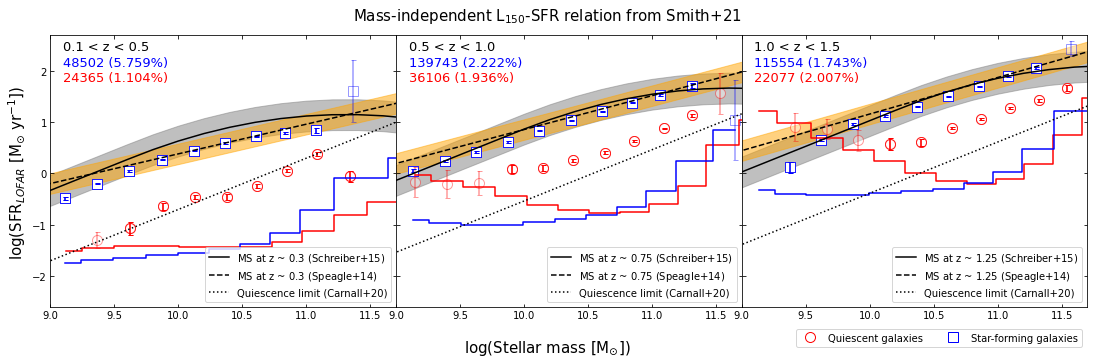

In [43]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_smith_unc']/(data.loc[(data['Type']=='QG'),'SFR_smith']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_smith_unc']/(data.loc[(data['Type']=='SFG'),'SFR_smith']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_smith_unc']/(data.loc[(data['Type']=='QG'),'SFR_smith']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.4,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_smith_unc']/(data.loc[(data['Type']=='SFG'),'SFR_smith']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.4,label='_Star-forming galaxies')
    axs[i].step(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+21',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

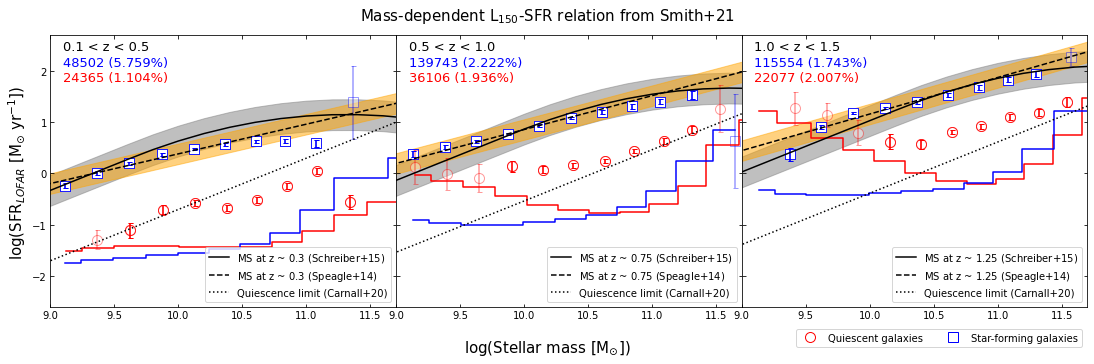

In [41]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_smith_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_smith_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_smith_M']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith_M']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_smith_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_smith_M']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_smith_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_smith_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_smith_M']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.4,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith_M']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_smith_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_smith_M']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.4,label='_Star-forming galaxies')
    axs[i].step(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-dependent L$_{150}$-SFR relation from Smith+21',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


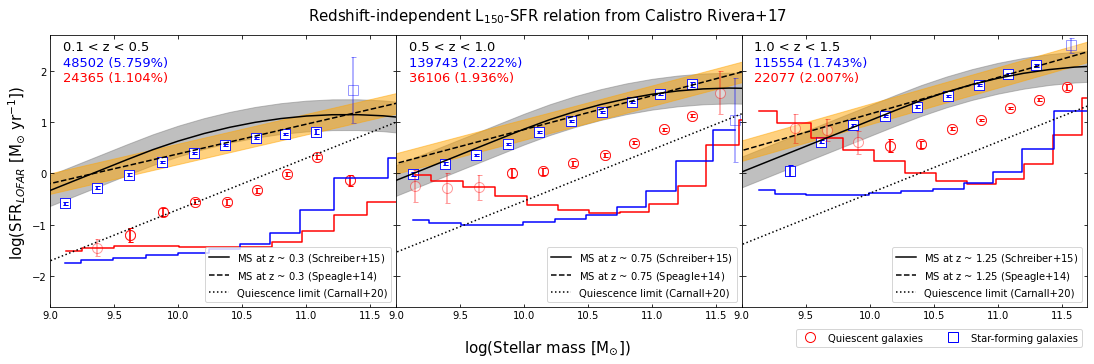

In [44]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CR_unc']/(data.loc[(data['Type']=='QG'),'SFR_CR']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CR_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CR']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CR_unc']/(data.loc[(data['Type']=='QG'),'SFR_CR']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.4,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CR_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CR']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.4,label='_Star-forming galaxies')
    axs[i].step(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-independent L$_{150}$-SFR relation from Calistro Rivera+17',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


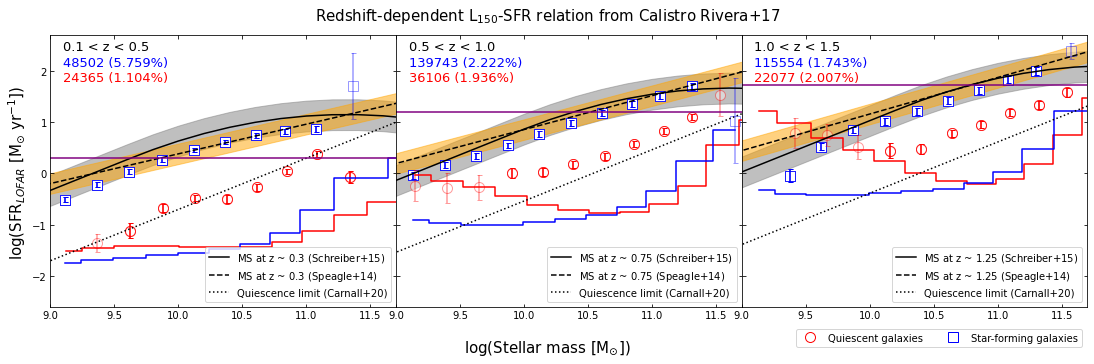

In [45]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='QG'),'SFR_CRz']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CRz']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='QG'),'SFR_CRz']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.4,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CRz']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.4,label='_Star-forming galaxies')
    axs[i].step(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-dependent L$_{150}$-SFR relation from Calistro Rivera+17',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## Comparing SFR from stacks with and without radio detections

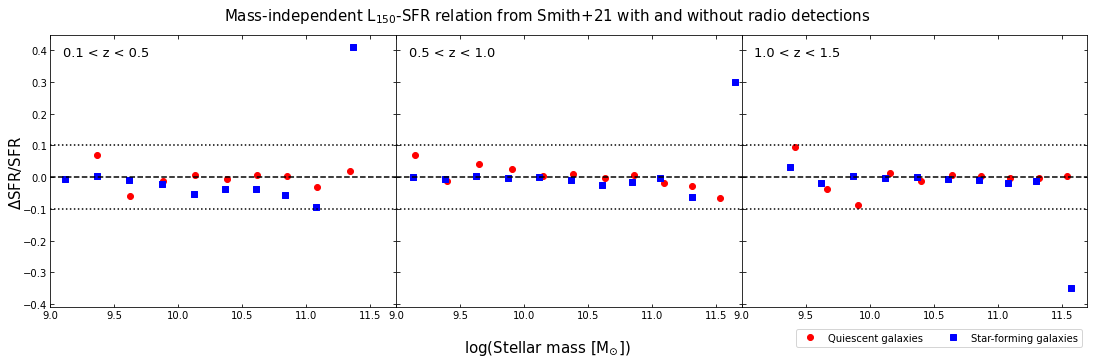

In [8]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].scatter(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_smith'])-np.array(data.loc[(data['Type']=='QG')&(data['Detections']==0),'SFR_smith']))/np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_smith']),
                   marker='o',color='r',label='Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_smith'])-np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==0),'SFR_smith']))/np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_smith']),
                   marker='s',color='b',label='Star-forming galaxies')
    axs[i].plot([9,11.7],[0,0],'--',c='k')
    axs[i].plot([9,11.7],[0.1,0.1],':',c='k')
    axs[i].plot([9,11.7],[-0.1,-0.1],':',c='k')
    axs[i].text(9.1,0.38,f'{za} < z < {zb}',size=13,color='k')
#    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+21 with and without radio detections',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"$\Delta$SFR/SFR", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='r',mec='r',ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='b',mec='b',ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

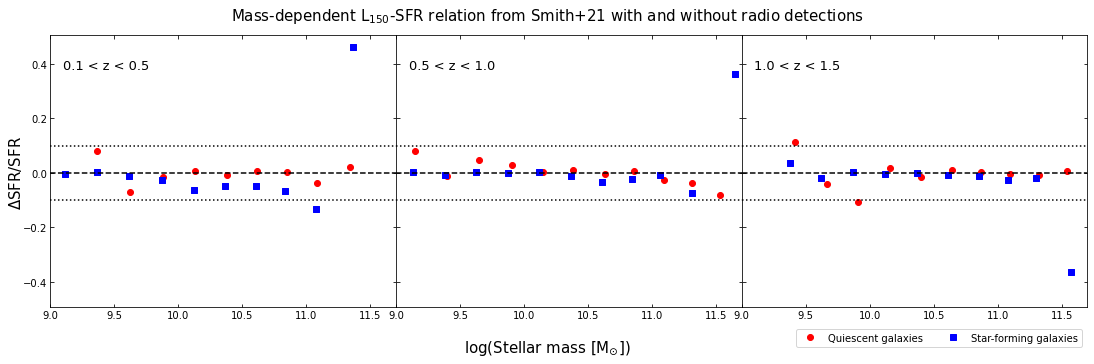

In [9]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].scatter(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_smith_M'])-np.array(data.loc[(data['Type']=='QG')&(data['Detections']==0),'SFR_smith_M']))/np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_smith_M']),
                   marker='o',color='r',label='Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_smith_M'])-np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==0),'SFR_smith_M']))/np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_smith_M']),
                   marker='s',color='b',label='Star-forming galaxies')
    axs[i].plot([9,11.7],[0,0],'--',c='k')
    axs[i].plot([9,11.7],[0.1,0.1],':',c='k')
    axs[i].plot([9,11.7],[-0.1,-0.1],':',c='k')
    axs[i].text(9.1,0.38,f'{za} < z < {zb}',size=13,color='k')
#    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-dependent L$_{150}$-SFR relation from Smith+21 with and without radio detections',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"$\Delta$SFR/SFR", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='r',mec='r',ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='b',mec='b',ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

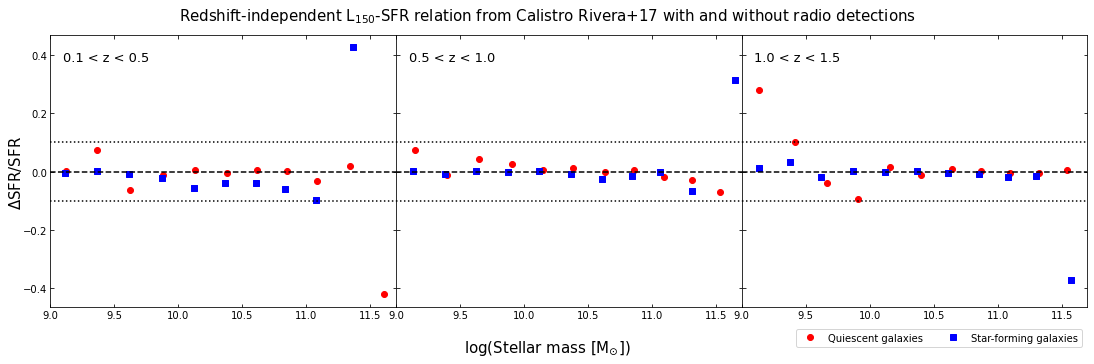

In [10]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].scatter(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_CR'])-np.array(data.loc[(data['Type']=='QG')&(data['Detections']==0),'SFR_CR']))/np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_CR']),
                   marker='o',color='r',label='Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_CR'])-np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==0),'SFR_CR']))/np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_CR']),
                   marker='s',color='b',label='Star-forming galaxies')
    axs[i].plot([9,11.7],[0,0],'--',c='k')
    axs[i].plot([9,11.7],[0.1,0.1],':',c='k')
    axs[i].plot([9,11.7],[-0.1,-0.1],':',c='k')
    axs[i].text(9.1,0.38,f'{za} < z < {zb}',size=13,color='k')
#    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-independent L$_{150}$-SFR relation from Calistro Rivera+17 with and without radio detections',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"$\Delta$SFR/SFR", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='r',mec='r',ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='b',mec='b',ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

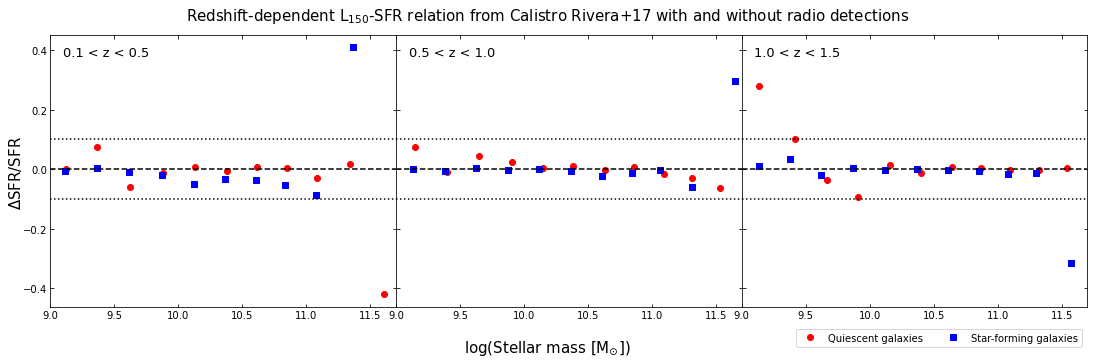

In [11]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].scatter(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_CRz'])-np.array(data.loc[(data['Type']=='QG')&(data['Detections']==0),'SFR_CRz']))/np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_CRz']),
                   marker='o',color='r',label='Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_CRz'])-np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==0),'SFR_CRz']))/np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_CRz']),
                   marker='s',color='b',label='Star-forming galaxies')
    axs[i].plot([9,11.7],[0,0],'--',c='k')
    axs[i].plot([9,11.7],[0.1,0.1],':',c='k')
    axs[i].plot([9,11.7],[-0.1,-0.1],':',c='k')
    axs[i].text(9.1,0.38,f'{za} < z < {zb}',size=13,color='k')
#    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-dependent L$_{150}$-SFR relation from Calistro Rivera+17 with and without radio detections',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"$\Delta$SFR/SFR", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='r',mec='r',ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='b',mec='b',ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## Deviations from SFR predicted by main sequence

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


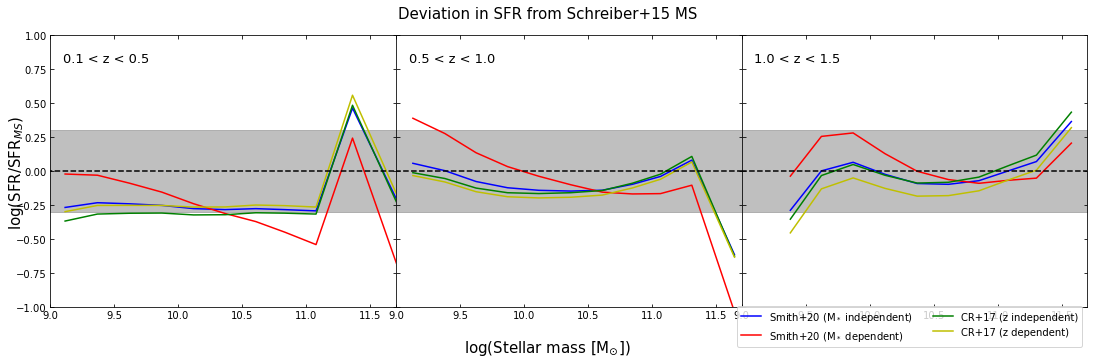

In [101]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Smith+20 (M$_*$ independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith_M'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Smith+20 (M$_*$ dependent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='g', label=f'CR+17 (z independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='y', label=f'CR+17 (z dependent)')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.3,-0.3],[0.3,0.3],alpha=0.5,color='grey')
    axs[i].text(9.1,0.8,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Schreiber+15 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Smith+20 (M$_*$ independent)')
marker2=plt.errorbar([],[],c='r', label=f'Smith+20 (M$_*$ dependent)')
marker3=plt.errorbar([],[],c='g', label=f'CR+17 (z independent)')
marker4=plt.errorbar([],[],c='y', label=f'CR+17 (z dependent)')
fig.legend(handles=[marker1,marker2,marker3,marker4],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


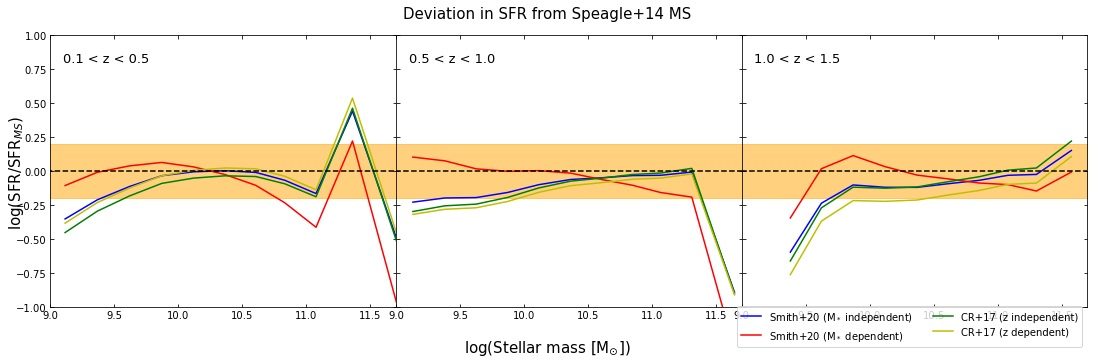

In [102]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Smith+20 (M$_*$ independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith_M'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Smith+20 (M$_*$ dependent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='g', label=f'CR+17 (z independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='y', label=f'CR+17 (z dependent)')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.2,-0.2],[0.2,0.2],alpha=0.5,color='orange')
    axs[i].text(9.1,0.8,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Speagle+14 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Smith+20 (M$_*$ independent)')
marker2=plt.errorbar([],[],c='r', label=f'Smith+20 (M$_*$ dependent)')
marker3=plt.errorbar([],[],c='g', label=f'CR+17 (z independent)')
marker4=plt.errorbar([],[],c='y', label=f'CR+17 (z dependent)')
fig.legend(handles=[marker1,marker2,marker3,marker4],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## LOFAR detection fractions

In [57]:
from scipy.stats import beta

In [58]:
def error(k,n):
    c = 0.683 #1sigma confidence
    p_lower = beta.ppf((1-c)/2.,k+1,n-k+1)
    p_upper = beta.ppf(1-(1-c)/2.,k+1,n-k+1)
    err_low = (k/n) - p_lower
    err_up = p_upper - (k/n)
    return err_low,err_up

In [59]:
results['frac_err_l'], results['frac_err_u'] = error(results['Radio_detected'],results['Count'])

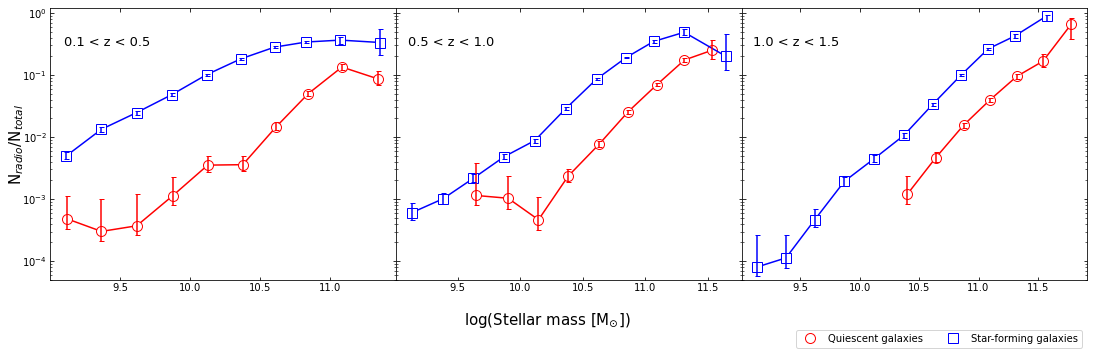

In [72]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Radio_detected']>0)]
    axs[i].errorbar(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                    data.loc[(data['Type']=='QG')&(data['Detections']==1),'Radio_detected']/data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'],
                    yerr=[data.loc[(data['Type']=='QG')&(data['Detections']==1),'frac_err_l'],data.loc[(data['Type']=='QG')&(data['Detections']==1),'frac_err_u']],
                    fmt='o-',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                    data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Radio_detected']/data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'],
                    yerr=[data.loc[(data['Type']=='SFG')&(data['Detections']==1),'frac_err_l'],data.loc[(data['Type']=='SFG')&(data['Detections']==1),'frac_err_u']],
                    fmt='s-',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    axs[i].text(9.1,0.3,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_yscale('log')
    axs[i].set_ylim(ymin=0.00005,ymax=1.2)
    #axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"N$_{radio}$/N$_{total}$", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',color='r',ms=10,label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',color='b',ms=10,label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

## Fitting grey body model to Herschel stacked fluxes to calculate SFR

In [12]:
def GreybodyPL(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for full IR regime
    given by an optically thick grey-body modelmodified with a MIR power-law
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    alpha = 2.0
    beta = 1.5
    Lc = (26.68 + alpha*6.246)**-2 + (1.905*(10**-4) + alpha*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

In [125]:
def HerschelLIR(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    if (~np.isfinite(dlist)).any():
        print('Failed nan check')
        return np.nan, np.nan, np.nan
    else:            
        x_data = np.array([100.,160.,250.,350.,500.])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        except RuntimeError:
            print('Failed fit')
            return np.nan, np.nan, np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
        print(z_obj,np.log10(LIR_LSun))
    
        return popt[0], popt[1], np.log10(LIR_LSun)

V_Herschel = np.vectorize(HerschelLIR)

In [112]:
### FOR TRIAL USE

def HerschelLIR(z_obj,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5])
    y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
    if (~np.isfinite(dlist)).any():
        print('Failed nan check')
        return np.nan, np.nan, np.nan
    elif (~(y_data>0)).all():
        print('No positive fluxes')
        return np.nan, np.nan, np.nan
    else:            
        x_data = np.array([100.,160.,250.,350.,500.])
        #y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        y_err = np.array([unc1,unc2,unc3,unc4,unc5])*10**-3 # data in mJy
        x_data = x_data[y_data>0]
        y_err = y_err[y_data>0]
        y_data = y_data[y_data>0]
        print(z_obj)
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,sigma=y_err,absolute_sigma=True,p0=[30,10**4])#,bounds=([10,100],[100,np.inf]))
        except RuntimeError:
            print('Failed fit')
            return np.nan, np.nan, np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return popt[0], popt[1], np.log10(LIR_LSun)

V_Herschel = np.vectorize(HerschelLIR)

In [13]:
### FOR TRIAL USE

def HerschelLIR(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
    if (~np.isfinite(dlist)).any():
        print('Failed nan check')
        return np.nan, np.nan, np.nan
    elif (np.count_nonzero(y_data>0))<2:
        print('Less than 2 valid data points')
        return np.nan, np.nan, np.nan
    else:            
        x_data = np.array([100.,160.,250.,350.,500.])
        #y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        x_data = x_data[y_data>0]
        y_data = y_data[y_data>0]
        #print(x_data)
        #print(y_data)
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])#,bounds=([10,100],[100,np.inf]))
        except RuntimeError:
            print('Failed fit')
            return np.nan, np.nan, np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
        print(z_obj,np.log10(LIR_LSun))
    
        return popt[0], popt[1], np.log10(LIR_LSun)

V_Herschel = np.vectorize(HerschelLIR)

In [128]:
results['Tdust'], results['Norm'], results['LIR_H'] = V_Herschel(results['Median_redshift'],results['100_flux(mJy)'],results['160_flux(mJy)'],results['250_flux(mJy)'],results['350_flux(mJy)'],results['500_flux(mJy)'])

results['SFR_H'] = np.power(10,results['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998

0.3871 10.389261232236327
0.3871 10.389261232236327
0.3823 10.575005715432198
0.3793 10.723563840745317
Too few positive fluxes
0.4475 11.094889752185367
0.4354 10.94228011261682
0.4932 11.427392305110432
Too few positive fluxes
0.7018 10.800803625702555
0.7099 11.243599084126874
0.7578 11.455225452713169
0.74 11.05099970071777
0.741 11.445183282032373
0.83885 11.699101740947137
0.8448 11.757642405387312
0.8348 11.895856602145619
0.7847500000000001 11.929168879134965
Too few positive fluxes


<ipython-input-103-b7a51d0c57cb>:10: RuntimeWarning: invalid value encountered in double_scalars
  Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)


1.1811 12.08624889888611
Too few positive fluxes
Failed fit
1.2709 10.296601881891432
1.3703 11.633169620648443
1.3615 11.875318171762986
1.32525 11.997810563970956
1.3461 12.365953561440012
1.3297 12.462641604251678
1.0925 12.103242759659125
Too few positive fluxes
Too few positive fluxes
Too few positive fluxes
Too few positive fluxes
Too few positive fluxes
0.3599 9.702896977960156
0.37645 9.864699133126333
0.3916 9.693729475051269
0.4135 9.942472792227957
Too few positive fluxes
Too few positive fluxes
Too few positive fluxes
Too few positive fluxes
Too few positive fluxes
Too few positive fluxes
Too few positive fluxes
Too few positive fluxes
Too few positive fluxes
0.7263 10.256442512380122
0.7621 10.130825412635643
0.7706500000000001 10.859258735683985
0.7771 10.605971676494896
0.78195 10.899634343941882
0.8862 11.685680092675272
0.5658000000000001 11.436798647320977
0.6287 11.625381405558622
Too few positive fluxes
Too few positive fluxes
1.1911999999999998 12.713509801267941
1

In [32]:
flux_lim = pd.read_csv(path+'Results/Bootes_Herschel_depth.csv')
flux_lim

,pacs_100_pix,pacs_160_pix,spire_250_beam,spire_350_beam,spire_500_beam,pacs_100_beam,pacs_160_beam,Tdust_03,Norm_03,LIR_H_03,SFR_H_03,Tdust_075,Norm_075,LIR_H_075,SFR_H_075,Tdust_125,Norm_125,LIR_H_125,SFR_H_125
0,1.149182,1.336372,7.228171,7.318360,8.306016,15.052586,20.357979,39.609918,7.063704e+05,10.853297,7.234691,58.633583,1.939880e+05,11.944329,89.217824,80.172339,7.242598e+04,12.609023,412.236471
1,0.906200,1.042286,7.228171,7.318360,8.306016,11.869885,15.877934,36.222156,7.841522e+05,10.734541,5.503820,53.194761,2.167731e+05,11.820543,67.091250,72.417795,8.108435e+04,12.482132,307.790515
2,3.356399,5.048370,21.531144,19.950767,20.563881,43.963857,76.905676,38.752787,2.525143e+06,11.366555,23.587295,57.527331,6.814509e+05,12.456433,290.105846,78.959972,2.498785e+05,13.120574,1338.743276
3,3.973289,6.015545,21.531144,19.950767,20.563881,52.044205,91.639404,40.270196,2.580748e+06,11.446167,28.332839,60.029583,6.931823e+05,12.538786,350.678523,82.602361,2.535838e+05,13.204688,1624.841022
4,NaN,NaN,7.000000,7.500000,13.000000,0.800000,2.400000,8.893827,1.395527e+08,10.101365,1.280819,12.364468,3.502756e+07,11.181345,15.398131,16.576309,1.073491e+07,11.838381,69.904273


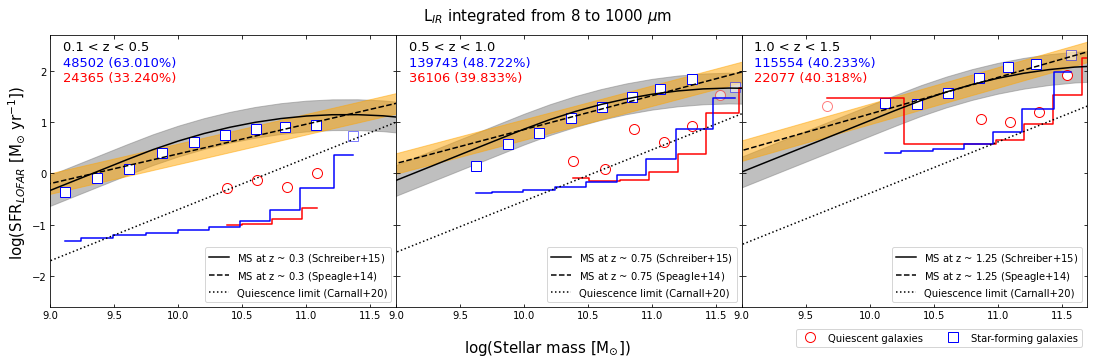

In [73]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[flux_lim.loc[1,'SFR_H_03'],flux_lim.loc[1,'SFR_H_075'],flux_lim.loc[1,'SFR_H_125']]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']<=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='QG'),'SFR_H_unc']/(data.loc[(data['Type']=='QG'),'SFR_H']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='SFG'),'SFR_H_unc']/(data.loc[(data['Type']=='SFG'),'SFR_H']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='QG'),'SFR_H_unc']/(data.loc[(data['Type']=='QG'),'SFR_H']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='SFG'),'SFR_H_unc']/(data.loc[(data['Type']=='SFG'),'SFR_H']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].step(data.loc[(data['Type']=='QG')&(data['SFR_H']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['SFR_H']>0),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['SFR_H']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['SFR_H']>0),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','IR_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','IR_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('L$_{IR}$ integrated from 8 to 1000 $\mu$m',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


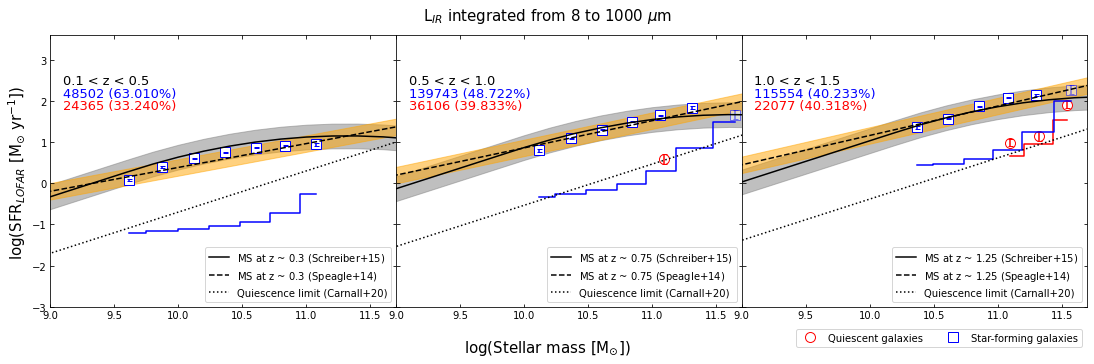

In [81]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[flux_lim.loc[1,'SFR_H_03'],flux_lim.loc[1,'SFR_H_075'],flux_lim.loc[1,'SFR_H_125']]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']<=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].step(data.loc[(data['Type']=='QG')&(data['SFR8_median']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['SFR8_median']>0),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['SFR8_median']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['SFR8_median']>0),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','IR_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','IR_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    #axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('L$_{IR}$ integrated from 8 to 1000 $\mu$m',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## Ratio bewtween LOFAR and Herschel SFRs

In [27]:
results['SFR8_ratio']=results['SFR_smith']/results['SFR8_median']
results['SFR8_ratio_unc']=np.sqrt( (results['SFR8_ratio']**2)*((results['SFR_smith_unc']/results['SFR_smith'])**2 + (results['SFR8_upper']/results['SFR8_median'])**2) )
results['SFR40_ratio']=results['SFR_smith']/results['SFR40_median']
results['SFR40_ratio_unc']=np.sqrt( (results['SFR40_ratio']**2)*((results['SFR_smith_unc']/results['SFR_smith'])**2 + (results['SFR40_upper']/results['SFR40_median'])**2) )

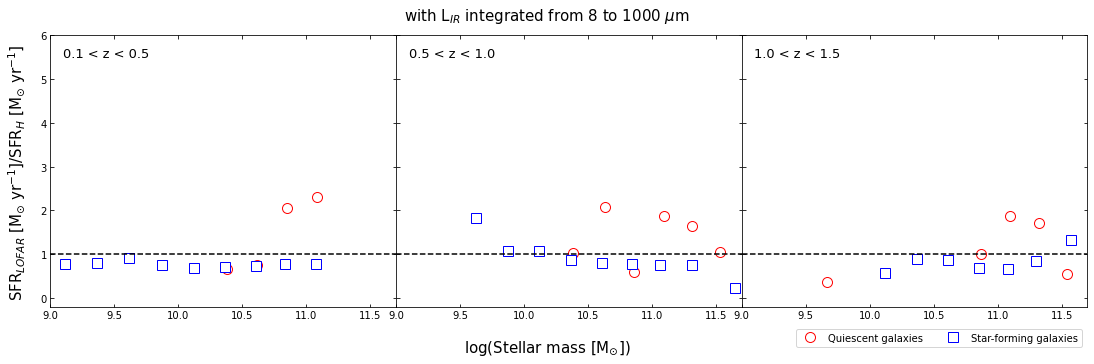

In [205]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR_smith']/data.loc[(data['Type']=='QG'),'SFR_H'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR_smith']/data.loc[(data['Type']=='SFG'),'SFR_H'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 8 to 1000 $\mu$m',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$]/SFR$_{H}$ [M$_{\odot}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


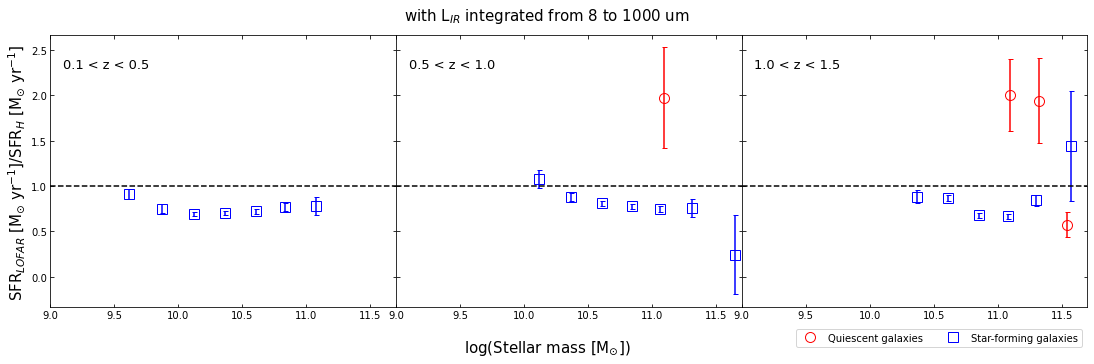

In [80]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR8_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR8_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,2.3,f'{za} < z < {zb}',size=13,color='k')
    #axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 8 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$]/SFR$_{H}$ [M$_{\odot}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


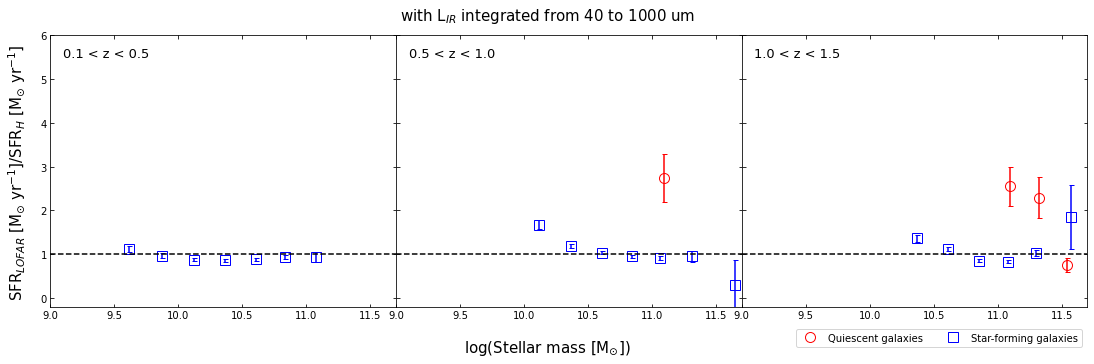

In [34]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR40_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR40_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR40_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR40_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 40 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$]/SFR$_{H}$ [M$_{\odot}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

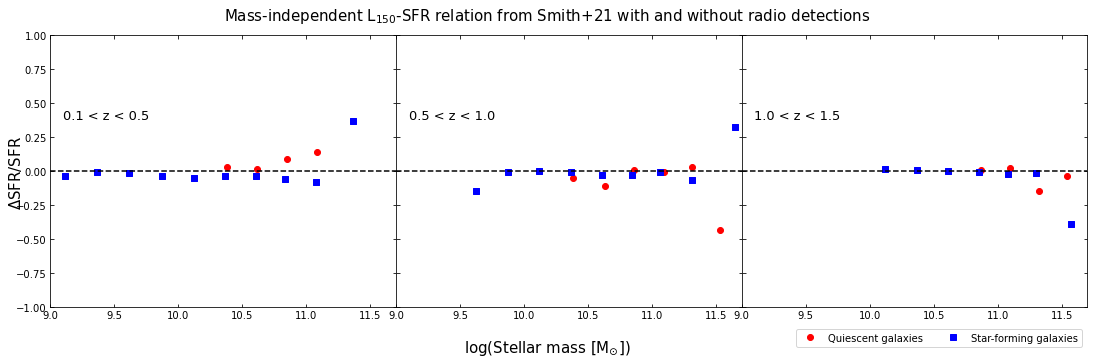

In [153]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].scatter(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_H'])-np.array(data.loc[(data['Type']=='QG')&(data['Detections']==0),'SFR_H']))/np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_H']),
                   marker='o',color='r',label='Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_H'])-np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==0),'SFR_H']))/np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_H']),
                   marker='s',color='b',label='Star-forming galaxies')
    axs[i].plot([9,11.7],[0,0],'--',c='k')
    axs[i].text(9.1,0.38,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1,ymax=1)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+21 with and without radio detections',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"$\Delta$SFR/SFR", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='r',mec='r',ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='b',mec='b',ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## Using emcee to estimate uncertainties on SFR derived from Herschel stacking


In [14]:
def model(theta,x):
    T, Nbb = theta
    a = 2.0
    b = 1.5
    Lc = (26.68 + a*6.246)**-2 + (1.905*(10**-4) + a*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**b))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
    return flux

In [15]:
def log_likelihood(theta, x, y, yerr):
    model1 = model(theta,x)    
    lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )    
    return lnlike

In [16]:
def log_prior(theta):
    T, Nbb = theta
    if 0. < T < 100. and 0. < Nbb:
        return 0.0
    return -np.inf

In [17]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [21]:
def SFR_MCMC(z_obj,Tdust,Norm,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5):
        
    y = np.array([S1,S2,S3,S4,S5])*10**-3 # data is in mJy
    if (np.count_nonzero(y>0))<2:
        print('Less than 2 valid data points')
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        
        x = np.array([100.,160.,250.,350.,500.])/(1+z_obj) # shift wavelengths to rest-frame
        #y = np.array([S1,S2,S3,S4,S5])*10**-3
        yerr = np.array([unc1,unc2,unc3,unc4,unc5])*10**-3 # data is in mJy
        x = x[y>0]
        yerr = yerr[y>0]
        y = y[y>0]
        initial = np.array([Tdust,Norm])
        print('Initial values: ',initial)
    
        ndim = len(initial)
        nwalkers = 64
        p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]
        sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
        sampler.run_mcmc(p0, 50000, progress=True);
    
        tau = sampler.get_autocorr_time()
        print('Autocorrelation time: ',tau)
        flat_samples = sampler.get_chain(discard=np.floor(tau[0]*3).astype(int), thin=np.floor(tau[0]/2).astype(int), flat=True)
        print('Chain shape: ',flat_samples.shape)
    
        inds = np.random.randint(len(flat_samples), size=500)
        LIR_list8=[]
        LIR_list40=[]
        SFR_list8=[]
        SFR_list40=[]
        for ind in inds:
            sample = flat_samples[ind]
            dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
            integral8, abserr = quad(lambda x: GreybodyPL(x,sample[0],sample[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
            integral40, abserr = quad(lambda x: GreybodyPL(x,sample[0],sample[1])/(x**2),40,1000) # c/lambda^2 factor gives flux density per unit wavelength
            LIR8 = integral8*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6) #   c    *   Jy   * 1/micron
            LIR40 = integral40*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6) #   c    *   Jy   * 1/micron
            LIR_LSun8 = LIR8/(3.828*10**26)
            LIR_LSun40 = LIR40/(3.828*10**26)
            LIR_list8.append(np.log10(LIR8/(3.828*10**26)))
            LIR_list40.append(np.log10(LIR40/(3.828*10**26)))
            SFR_list8.append(LIR_LSun8/(1.7*5.8*10**9)) # Kennicutt 1998 + Man 2016
            SFR_list40.append(LIR_LSun40/(1.7*5.8*10**9))
        print('LIR: ',np.percentile(LIR_list8,[16,50,84]))
        print('SFR: ',np.percentile(SFR_list8,[16,50,84]))
        SFR_diff8 = np.diff(np.percentile(SFR_list8,[16,50,84]))
        SFR_diff40 = np.diff(np.percentile(SFR_list40,[16,50,84]))
        print('SFR diff: ',SFR_diff8,'\n')
        
        #return np.median(LIR_list), np.median(SFR_list), SFR_diff[0], SFR_diff[1]
        return np.median(LIR_list8), np.median(LIR_list40), np.median(SFR_list8), np.median(SFR_list40), SFR_diff8[0], SFR_diff40[0], SFR_diff8[1], SFR_diff40[1]

#SFR_MCMC_v = np.vectorize(SFR_MCMC)

In [180]:
n=130
try:
    results.loc[n,'LIR8_median'], results.loc[n,'LIR40_median'], results.loc[n,'SFR8_median'], results.loc[n,'SFR40_median'], results.loc[n,'SFR8_lower'], results.loc[n,'SFR40_lower'], results.loc[n,'SFR8_upper'], results.loc[n,'SFR40_upper'] = SFR_MCMC(results.loc[n,'Median_redshift'],30,10000,results.loc[n,'100_flux(mJy)'],results.loc[n,'160_flux(mJy)'],results.loc[n,'250_flux(mJy)'],results.loc[n,'350_flux(mJy)'],results.loc[n,'500_flux(mJy)'],results.loc[n,'100_std(mJy)'],results.loc[n,'160_std(mJy)'],results.loc[n,'250_std(mJy)'],results.loc[n,'350_std(mJy)'],results.loc[n,'500_std(mJy)'])
    if (~np.isnan(results.loc[n,'LIR8_median'])):
        print('Success at : ',n,'\n')
    else:
        print('At : ',n,'\n')
except:
    print('Failed at : ',n,'\n')

  0%|          | 10/10000 [00:00<01:49, 91.27it/s]

Initial values:  [   30 10000]


  1%|          | 58/10000 [00:00<01:47, 92.50it/s]<ipython-input-154-1b206da5e45e>:7: RuntimeWarning: overflow encountered in exp
  flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
100%|██████████| 10000/10000 [01:43<00:00, 96.90it/s]


Autocorrelation time:  [81.11610983 87.44191889]
Chain shape:  (15552, 2)
LIR:  [12.18793852 12.26007074 12.3347115 ]
SFR:  [156.33717502 184.58390518 219.1969909 ]
SFR diff:  [28.24673016 34.61308572] 

Success at :  130 



In [181]:
results.loc[130,['SFR_H','SFR8_median','SFR40_median']]

SFR_H           191.912471
SFR8_median     184.583905
SFR40_median    152.919283
Name: 130, dtype: object

In [22]:
#for n in range(len(results[results['Detections']==0]),len(results)):
for n in range(130,len(results)):
    try:
        results.loc[n,'LIR8_median'], results.loc[n,'LIR40_median'], results.loc[n,'SFR8_median'], results.loc[n,'SFR40_median'], results.loc[n,'SFR8_lower'], results.loc[n,'SFR40_lower'], results.loc[n,'SFR8_upper'], results.loc[n,'SFR40_upper'] = SFR_MCMC(results.loc[n,'Median_redshift'],results.loc[n,'Tdust'],results.loc[n,'Norm'],results.loc[n,'100_flux(mJy)'],results.loc[n,'160_flux(mJy)'],results.loc[n,'250_flux(mJy)'],results.loc[n,'350_flux(mJy)'],results.loc[n,'500_flux(mJy)'],results.loc[n,'100_std(mJy)'],results.loc[n,'160_std(mJy)'],results.loc[n,'250_std(mJy)'],results.loc[n,'350_std(mJy)'],results.loc[n,'500_std(mJy)'])
        if (~np.isnan(results.loc[n,'LIR8_median'])):
            print('Success at : ',n,'\n')
        else:
            print('At : ',n,'\n')
    except:
        print('Failed at : ',n,'\n')

Initial values:  [3.23812810e+01 1.48579334e+06]


 16%|█▌        | 8103/50000 [01:22<07:10, 97.26it/s] <ipython-input-14-1b206da5e45e>:7: RuntimeWarning: overflow encountered in exp
  flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
100%|██████████| 50000/50000 [08:25<00:00, 98.99it/s] 


Autocorrelation time:  [71.09431089 83.47151267]
Chain shape:  (91008, 2)


  0%|          | 0/50000 [00:00<?, ?it/s]

LIR:  [12.17427374 12.25817452 12.32588755]
SFR:  [151.4944863  183.77973115 214.78842391]
SFR diff:  [32.28524485 31.00869276] 

Success at :  130 

Less than 2 valid data points
At :  131 

Less than 2 valid data points
At :  132 

Less than 2 valid data points
At :  133 

Less than 2 valid data points
At :  134 

Less than 2 valid data points
At :  135 

Initial values:  [1.75054561e+01 1.28540418e+06]


  2%|▏         | 849/50000 [00:07<06:24, 127.67it/s]<ipython-input-14-1b206da5e45e>:6: RuntimeWarning: overflow encountered in exp
  Npl = Nbb*((1-np.exp(-(200*Lc)**b))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
  0%|          | 10/50000 [00:00<08:36, 96.83it/s]

Failed at :  136 

Initial values:  [   40.53230272 39238.09302305]


  0%|          | 11/50000 [00:00<08:03, 103.28it/s]

Failed at :  137 

Initial values:  [2.80344220e+01 1.28088122e+05]


 60%|██████    | 30072/50000 [03:28<02:12, 150.41it/s]/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 60%|██████    | 30088/50000 [03:29<02:50, 116.74it/s]<ipython-input-15-e80b04eba2b5>:3: RuntimeWarning: overflow encountered in true_divide
  lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
 61%|██████    | 30472/50000 [03:31<02:12, 147.76it/s]<ipython-input-15-e80b04eba2b5>:3: RuntimeWarning: overflow encountered in square
  lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
 84%|████████▎ | 41851/50000 [04:49<00:54, 148.98it/s]/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/moves/stretch.py:33: RuntimeWarning: overflow encountered in multiply
  return c[rint] - (c[rint] - s) * zz[:, None], factors
  0%|          | 11/50000 [00:00<07:55, 105.14it/s]

Failed at :  138 

Initial values:  [2.83652270e+01 2.05783276e+05]


  0%|          | 0/50000 [00:00<?, ?it/s]

Failed at :  139 

Less than 2 valid data points
At :  140 

Less than 2 valid data points
At :  141 

Less than 2 valid data points
At :  142 

Less than 2 valid data points
At :  143 

Less than 2 valid data points
At :  144 

Less than 2 valid data points
At :  145 

Less than 2 valid data points
At :  146 

Less than 2 valid data points
At :  147 

Less than 2 valid data points
At :  148 

Initial values:  [   39.64131354 20567.09178241]


  0%|          | 10/50000 [00:00<08:55, 93.27it/s]

Failed at :  149 

Initial values:  [   38.83403187 14117.11660706]


  0%|          | 11/50000 [00:00<07:54, 105.27it/s]

Failed at :  150 

Initial values:  [2.34450400e+01 7.44189684e+05]


  0%|          | 10/50000 [00:00<08:26, 98.73it/s]

Failed at :  151 

Initial values:  [   54.56931712 10906.79123163]


100%|██████████| 50000/50000 [07:54<00:00, 105.30it/s]


Autocorrelation time:  [80.39595032 74.43268913]
Chain shape:  (79552, 2)


  0%|          | 11/50000 [00:00<08:00, 104.09it/s]

LIR:  [10.47921894 10.57752896 10.68481292]
SFR:  [3.05732797 3.83400447 4.90835549]
SFR diff:  [0.77667651 1.07435102] 

Success at :  152 

Initial values:  [  71.08406826 7517.5807994 ]


  0%|          | 10/50000 [00:00<08:24, 99.12it/s]

Failed at :  153 

Initial values:  [   61.98848871 40882.50613548]


  0%|          | 11/50000 [00:00<07:51, 106.08it/s]

Failed at :  154 

Initial values:  [2.92213080e+01 2.20807573e+06]


 19%|█▊        | 9255/50000 [01:16<05:36, 120.94it/s]
<ipython-input-15-e80b04eba2b5>:3: RuntimeWarning: divide by zero encountered in true_divide
  lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
  0%|          | 0/50000 [00:00<?, ?it/s]/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 8/50000 [00:00<10:54, 76.42it/s]

Failed at :  155 

Initial values:  [2.90083236e+01 2.74593517e+06]


100%|██████████| 50000/50000 [08:53<00:00, 93.70it/s]
/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/backends/backend.py:53: RuntimeWarning: overflow encountered in long_scalars
  v = getattr(self, name)[discard + thin - 1 : self.iteration : thin]
  0%|          | 0/50000 [00:00<?, ?it/s]

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  156 

Less than 2 valid data points
At :  157 

Less than 2 valid data points
At :  158 

Initial values:  [   47.20927401 34777.00363487]


 19%|█▊        | 9301/50000 [01:17<05:54, 114.76it/s]/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/moves/stretch.py:33: RuntimeWarning: overflow encountered in subtract
  return c[rint] - (c[rint] - s) * zz[:, None], factors
  0%|          | 10/50000 [00:00<08:20, 99.83it/s]

Failed at :  159 

Less than 2 valid data points
At :  160 

Less than 2 valid data points
At :  161 

Less than 2 valid data points
At :  162 

Less than 2 valid data points
At :  163 

Initial values:  [2.90131595e+01 1.63340078e+05]


  0%|          | 11/50000 [00:00<07:49, 106.44it/s]

Failed at :  164 

Initial values:  [   43.09783668 25349.2778759 ]


100%|██████████| 50000/50000 [07:47<00:00, 106.92it/s]


Autocorrelation time:  [357.58509535 728.76827696]
Chain shape:  (17536, 2)


  0%|          | 10/50000 [00:00<08:26, 98.75it/s]

LIR:  [10.85646035 10.97085082 11.04787112]
SFR:  [ 7.28758188  9.48361604 11.32385246]
SFR diff:  [2.19603417 1.84023642] 

Success at :  165 

Initial values:  [3.13731605e+01 1.41926521e+05]


100%|██████████| 50000/50000 [07:37<00:00, 109.40it/s]


Autocorrelation time:  [234.84754165 349.15498973]
Chain shape:  (26944, 2)


  0%|          | 10/50000 [00:00<08:31, 97.79it/s]

LIR:  [11.03482282 11.12888202 11.22069469]
SFR:  [10.98869706 13.6459918  16.85845723]
SFR diff:  [2.65729474 3.21246543] 

Success at :  166 

Initial values:  [4.60300323e+01 1.42589649e+05]


100%|██████████| 50000/50000 [08:00<00:00, 104.11it/s]


Autocorrelation time:  [76.09632113 98.46814942]
Chain shape:  (83776, 2)


  0%|          | 11/50000 [00:00<08:12, 101.44it/s]

LIR:  [11.82471721 11.89828658 11.97562853]
SFR:  [67.7392455  80.2434751  95.88521937]
SFR diff:  [12.5042296  15.64174427] 

Success at :  167 

Initial values:  [2.49230587e+01 1.46036637e+06]


  0%|          | 11/50000 [00:00<07:55, 105.22it/s]

Failed at :  168 

Initial values:  [1.71952024e+01 1.30916774e+06]


  0%|          | 10/50000 [00:00<08:22, 99.55it/s]

Failed at :  169 

Initial values:  [2.53219375e+01 3.54851261e+05]


  0%|          | 11/50000 [00:00<07:58, 104.50it/s]

Failed at :  170 

Initial values:  [3.48381247e+01 1.17714297e+05]


100%|██████████| 50000/50000 [08:05<00:00, 103.03it/s]


Autocorrelation time:  [70.04907132 78.18936733]
Chain shape:  (91008, 2)


  0%|          | 9/50000 [00:00<09:33, 87.13it/s]

LIR:  [10.05698377 10.08069348 10.10432133]
SFR:  [1.15639672 1.22128371 1.28956855]
SFR diff:  [0.06488699 0.06828483] 

Success at :  171 

Initial values:  [4.32448827e+01 9.29036257e+04]


100%|██████████| 50000/50000 [08:09<00:00, 102.21it/s]


Autocorrelation time:  [34.52961048 34.84337525]
Chain shape:  (187840, 2)


  0%|          | 10/50000 [00:00<08:41, 95.86it/s]

LIR:  [10.36880308 10.39005242 10.41401485]
SFR:  [2.37097062 2.48986334 2.63110358]
SFR diff:  [0.11889272 0.14124025] 

Success at :  172 

Initial values:  [4.03023148e+01 2.07549921e+05]


100%|██████████| 50000/50000 [08:10<00:00, 101.96it/s]


Autocorrelation time:  [32.77668231 32.85814539]
Chain shape:  (199552, 2)


  0%|          | 10/50000 [00:00<08:46, 94.94it/s]

LIR:  [10.58755337 10.60029531 10.61197014]
SFR:  [3.92352527 4.04034447 4.1504313 ]
SFR diff:  [0.1168192  0.11008683] 

Success at :  173 

Initial values:  [3.49211393e+01 5.28916983e+05]


100%|██████████| 50000/50000 [08:10<00:00, 101.94it/s]


Autocorrelation time:  [32.72769875 33.1209361 ]
Chain shape:  (199552, 2)


  0%|          | 10/50000 [00:00<08:30, 98.01it/s]

LIR:  [10.73624168 10.7456466  10.75356857]
SFR:  [5.52541319 5.64637459 5.75031572]
SFR diff:  [0.1209614  0.10394113] 

Success at :  174 

Initial values:  [3.39870425e+01 7.60442927e+05]


100%|██████████| 50000/50000 [08:13<00:00, 101.37it/s]


Autocorrelation time:  [32.28096805 32.30090486]
Chain shape:  (199616, 2)


  0%|          | 10/50000 [00:00<08:24, 99.13it/s]

LIR:  [10.84786053 10.85741318 10.86719631]
SFR:  [7.14469363 7.30358805 7.46997933]
SFR diff:  [0.15889442 0.16639128] 

Success at :  175 

Initial values:  [3.21967779e+01 1.02456066e+06]


100%|██████████| 50000/50000 [08:13<00:00, 101.28it/s]


Autocorrelation time:  [32.623217   32.82270418]
Chain shape:  (199552, 2)


  0%|          | 10/50000 [00:00<08:21, 99.62it/s]

LIR:  [10.88823866 10.90193571 10.91718946]
SFR:  [7.84082469 8.09205445 8.38132245]
SFR diff:  [0.25122975 0.289268  ] 

Success at :  176 

Initial values:  [2.93704014e+01 1.54817903e+06]


100%|██████████| 50000/50000 [08:11<00:00, 101.67it/s]


Autocorrelation time:  [39.25669188 40.10690789]
Chain shape:  (168000, 2)


  0%|          | 10/50000 [00:00<08:43, 95.41it/s]

LIR:  [10.90649995 10.94227805 10.97773699]
SFR:  [8.17755292 8.87975821 9.63518686]
SFR diff:  [0.70220528 0.75542865] 

Success at :  177 

Initial values:  [2.50855368e+01 3.24757271e+06]


  0%|          | 9/50000 [00:00<09:16, 89.87it/s]

Failed at :  178 

Initial values:  [nan nan]
Failed at :  179 

Less than 2 valid data points
At :  180 

Less than 2 valid data points
At :  181 

Initial values:  [2.61390501e+01 8.81725316e+04]


  0%|          | 9/50000 [00:00<09:15, 89.97it/s]

Failed at :  182 

Initial values:  [3.27771770e+01 8.40674303e+04]


  0%|          | 10/50000 [00:00<08:20, 99.87it/s]

Failed at :  183 

Initial values:  [  63.14844054 8727.57232992]


100%|██████████| 50000/50000 [08:10<00:00, 101.89it/s]


Autocorrelation time:  [39.98783061 39.82025682]
Chain shape:  (168000, 2)


  0%|          | 9/50000 [00:00<09:27, 88.03it/s]

LIR:  [10.7542432  10.79064298 10.82785998]
SFR:  [5.75925533 6.26276608 6.8231209 ]
SFR diff:  [0.50351075 0.56035482] 

Success at :  184 

Initial values:  [   50.16169118 42606.76864919]


100%|██████████| 50000/50000 [08:10<00:00, 101.85it/s]


Autocorrelation time:  [33.18696213 32.84691241]
Chain shape:  (199552, 2)


  0%|          | 9/50000 [00:00<09:41, 85.93it/s]

LIR:  [11.06983011 11.0833349  11.09924822]
SFR:  [11.9111363  12.28734327 12.74592354]
SFR diff:  [0.37620697 0.45858027] 

Success at :  185 

Initial values:  [4.24486957e+01 1.37714408e+05]


100%|██████████| 50000/50000 [08:12<00:00, 101.58it/s]


Autocorrelation time:  [31.39468937 31.79580011]
Chain shape:  (212928, 2)


  0%|          | 9/50000 [00:00<09:35, 86.88it/s]

LIR:  [11.28620102 11.2954345  11.30459255]
SFR:  [19.60307121 20.02431119 20.45105099]
SFR diff:  [0.42123998 0.4267398 ] 

Success at :  186 

Initial values:  [3.56460746e+01 4.35045294e+05]


100%|██████████| 50000/50000 [08:13<00:00, 101.36it/s]


Autocorrelation time:  [32.2541129  32.43514676]
Chain shape:  (199616, 2)


  0%|          | 9/50000 [00:00<10:03, 82.80it/s]

LIR:  [11.47620132 11.48505073 11.4925757 ]
SFR:  [30.36158279 30.98659333 31.52817153]
SFR diff:  [0.62501054 0.54157821] 

Success at :  187 

Initial values:  [3.52656937e+01 6.37740027e+05]


100%|██████████| 50000/50000 [08:12<00:00, 101.42it/s]


Autocorrelation time:  [32.42490954 32.69960897]
Chain shape:  (199552, 2)


  0%|          | 9/50000 [00:00<09:18, 89.50it/s]

LIR:  [11.63601744 11.64854018 11.66055135]
SFR:  [43.86726167 45.15057261 46.41671878]
SFR diff:  [1.28331095 1.26614616] 

Success at :  188 

Initial values:  [3.88354588e+01 6.10546713e+05]


100%|██████████| 50000/50000 [08:10<00:00, 101.85it/s]


Autocorrelation time:  [41.31672761 42.61556833]
Chain shape:  (159552, 2)


  0%|          | 10/50000 [00:00<08:44, 95.25it/s]

LIR:  [11.7885248  11.82651712 11.86158117]
SFR:  [62.3229391  68.02056049 73.74020316]
SFR diff:  [5.69762139 5.71964266] 

Success at :  189 

Initial values:  [3.97508826e+01 7.10661408e+05]


100%|██████████| 50000/50000 [07:45<00:00, 107.52it/s]


Autocorrelation time:  [109.67881016 135.95802986]
Chain shape:  (58816, 2)


  0%|          | 0/50000 [00:00<?, ?it/s]

LIR:  [11.54342223 11.65779024 11.76043733]
SFR:  [35.44421088 46.12255189 58.41988479]
SFR diff:  [10.67834101 12.2973329 ] 

Success at :  190 

Less than 2 valid data points
At :  191 

Less than 2 valid data points
At :  192 

Less than 2 valid data points
At :  193 

Less than 2 valid data points
At :  194 

Initial values:  [2.95332326e+01 2.88897053e+05]


  0%|          | 10/50000 [00:00<08:21, 99.75it/s]

Failed at :  195 

Initial values:  [   63.37614433 11551.97081723]


100%|██████████| 50000/50000 [08:12<00:00, 101.47it/s]


Autocorrelation time:  [34.95965656 34.96561359]
Chain shape:  (187840, 2)


  0%|          | 10/50000 [00:00<08:51, 94.02it/s]

LIR:  [11.31842639 11.34976973 11.38205652]
SFR:  [21.11297713 22.6930474  24.44441753]
SFR diff:  [1.58007027 1.75137014] 

Success at :  196 

Initial values:  [4.36331991e+01 8.39875855e+04]


100%|██████████| 50000/50000 [08:14<00:00, 101.18it/s]


Autocorrelation time:  [33.34121882 33.04738242]
Chain shape:  (199552, 2)


  0%|          | 10/50000 [00:00<08:25, 98.87it/s]

LIR:  [11.54590721 11.55923439 11.57140293]
SFR:  [35.6476     36.75847442 37.80297824]
SFR diff:  [1.11087442 1.04450382] 

Success at :  197 

Initial values:  [4.02522884e+01 2.27494510e+05]


100%|██████████| 50000/50000 [08:12<00:00, 101.44it/s]


Autocorrelation time:  [32.30272687 32.51474164]
Chain shape:  (199616, 2)


  0%|          | 11/50000 [00:00<08:10, 101.82it/s]

LIR:  [11.85387994 11.86206114 11.8696558 ]
SFR:  [72.4441005  73.821731   75.12403251]
SFR diff:  [1.3776305 1.3023015] 

Success at :  198 

Initial values:  [3.67905499e+01 5.04523279e+05]


100%|██████████| 50000/50000 [08:12<00:00, 101.48it/s]


Autocorrelation time:  [32.05582149 32.39956924]
Chain shape:  (199616, 2)


  0%|          | 10/50000 [00:00<08:20, 99.82it/s]

LIR:  [12.0584248  12.06701091 12.07599501]
SFR:  [116.02401239 118.34066387 120.81423101]
SFR diff:  [2.31665148 2.47356714] 

Success at :  199 

Initial values:  [3.30903874e+01 8.45883405e+05]


100%|██████████| 50000/50000 [08:12<00:00, 101.55it/s]


Autocorrelation time:  [35.04967082 35.13275164]
Chain shape:  (187840, 2)


  0%|          | 8/50000 [00:00<10:38, 78.28it/s]

LIR:  [12.10838972 12.13068412 12.15343103]
SFR:  [130.17057039 137.02733439 144.39565998]
SFR diff:  [6.85676399 7.36832559] 

Success at :  200 

Initial values:  [4.42280318e+01 3.54232381e+05]


100%|██████████| 50000/50000 [07:45<00:00, 107.36it/s]


Autocorrelation time:  [141.39892586 245.10427522]
Chain shape:  (45312, 2)
LIR:  [12.1536583 12.2674953 12.3698939]
SFR:  [144.47140144 187.76664594 237.69336246]
SFR diff:  [43.29524451 49.92671652] 

Success at :  201 

Initial values:  [nan nan]
Failed at :  202 

Less than 2 valid data points
At :  203 

Less than 2 valid data points
At :  204 



In [74]:
results.to_csv(path+'Results/results_Bootes_processed_'+strftime("%Y-%m-%d",localtime())+'.csv',index=False)

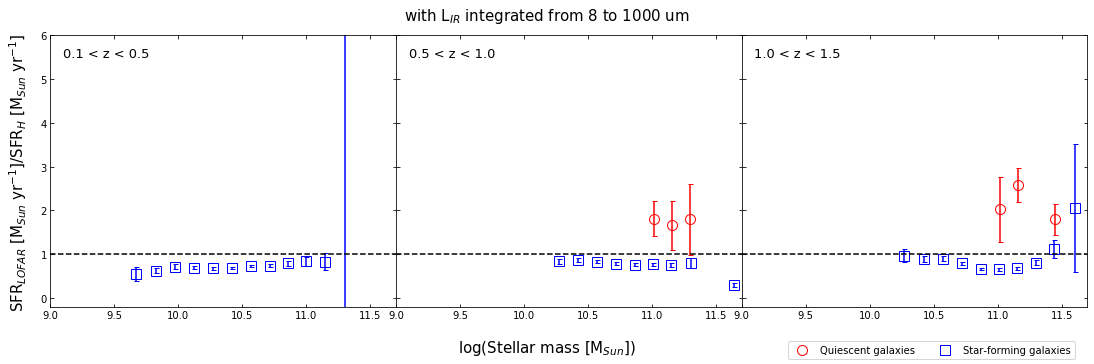

In [96]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR8_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR8_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 8 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$]/SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

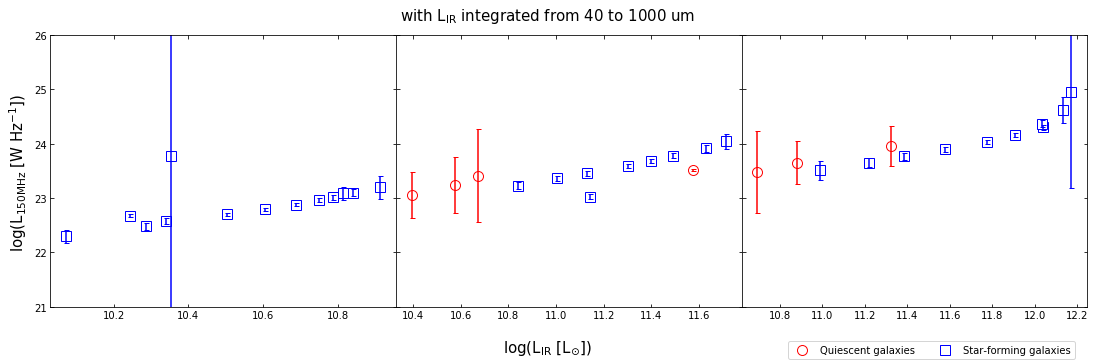

In [34]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'LIR40_median'],
                    np.log10(data.loc[(data['Type']=='QG'),'L150MHZ']),
                    yerr=data.loc[(data['Type']=='QG'),'SFR40_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'LIR40_median'],
                    np.log10(data.loc[(data['Type']=='SFG'),'L150MHZ']),
                    yerr=data.loc[(data['Type']=='SFG'),'SFR40_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    #axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    #axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=21,ymax=26)
    #axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{\mathrm{IR}}$ integrated from 40 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(L$_{\mathrm{IR}}$ [L$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(L$_{150 \mathrm{ MHz}}$ [W Hz$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

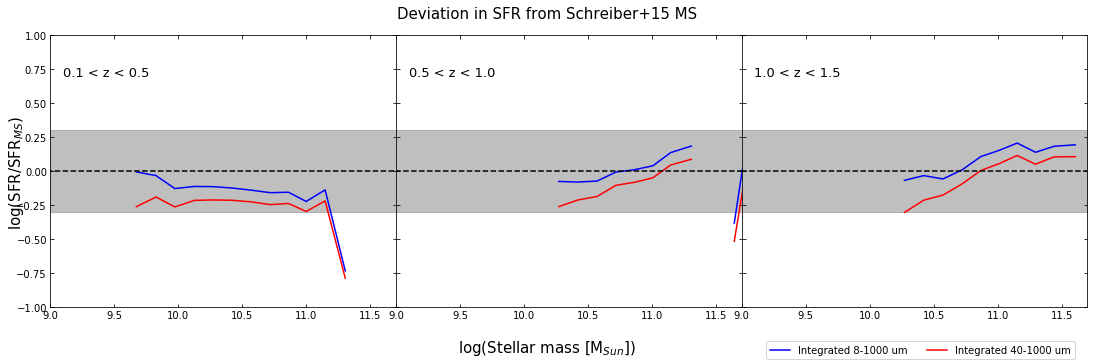

In [98]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Integrated 8-1000 um')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR40_median'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Integrated 40-1000 um')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.3,-0.3],[0.3,0.3],alpha=0.5,color='grey')
    axs[i].text(9.1,0.7,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Schreiber+15 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Integrated 8-1000 um')
marker2=plt.errorbar([],[],c='r', label=f'Integrated 40-1000 um')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

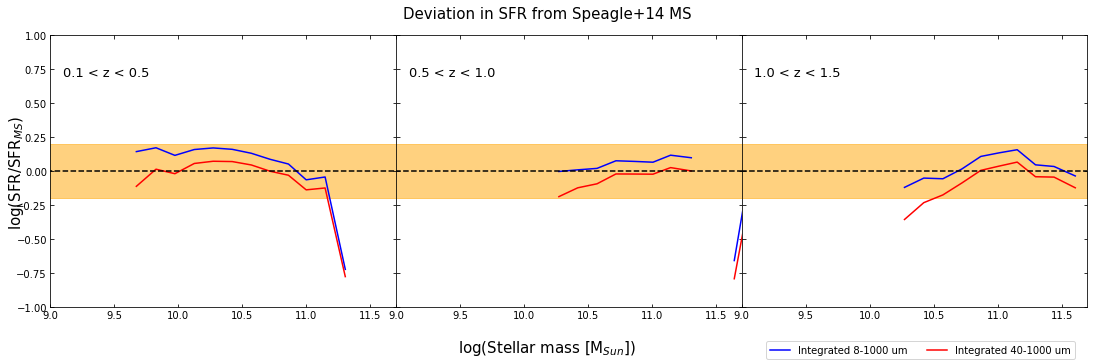

In [63]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Integrated 8-1000 um')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR40_median'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Integrated 40-1000 um')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.2,-0.2],[0.2,0.2],alpha=0.5,color='orange')
    axs[i].text(9.1,0.7,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Speagle+14 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Integrated 8-1000 um')
marker2=plt.errorbar([],[],c='r', label=f'Integrated 40-1000 um')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

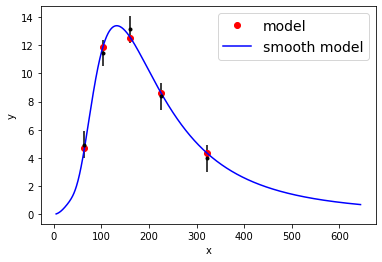

In [76]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[16,'100_flux(mJy)'],results_1.loc[16,'160_flux(mJy)'],results_1.loc[16,'250_flux(mJy)'],results_1.loc[16,'350_flux(mJy)'],results_1.loc[16,'500_flux(mJy)']])
yerr = np.array([results_1.loc[16,'100_std(mJy)'],results_1.loc[16,'160_std(mJy)'],results_1.loc[16,'250_std(mJy)'],results_1.loc[16,'350_std(mJy)'],results_1.loc[16,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x/1.55, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x/1.55,model((results_1.loc[16,'Tdust'],results_1.loc[16,'Norm']),x/(1.55))*10**3, "or", label="model")
plt.plot(x_new/1.55,model((results_1.loc[16,'Tdust'],results_1.loc[16,'Norm']),x_new/(1.55))*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [82]:
bad_list = list(results.loc[(results['Type']=='SFG')&(~np.isnan(results['SFR_H']))&(np.isnan(results['SFR8_median'])),['SFR_H','SFR8_median']].index)

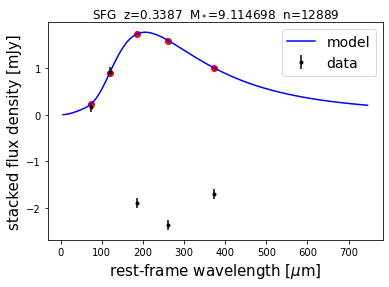

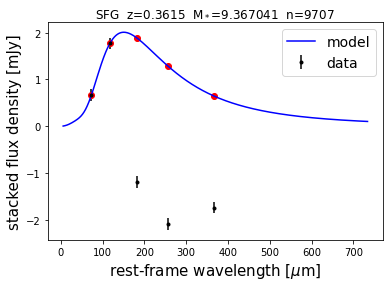

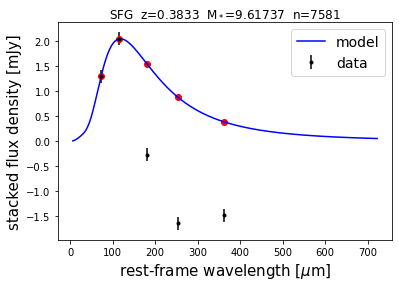

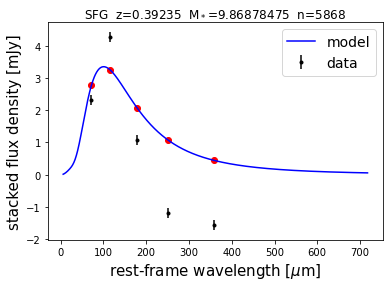

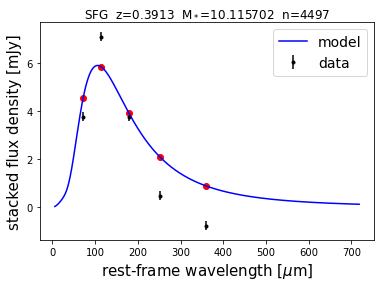

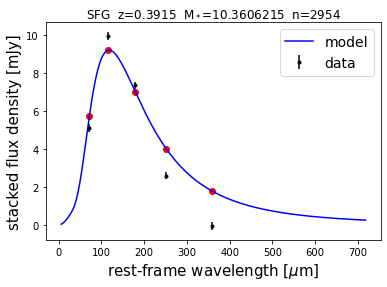

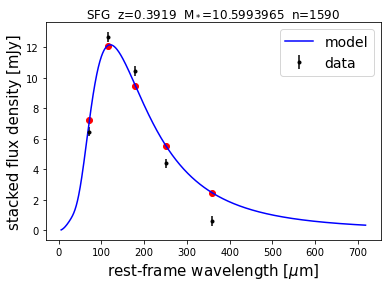

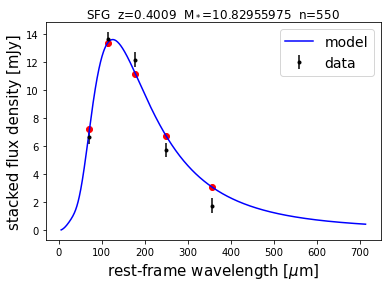

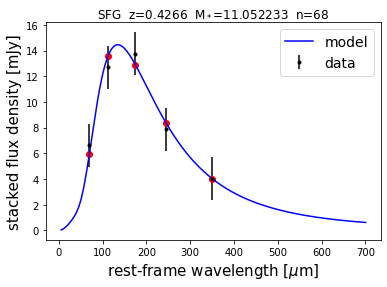

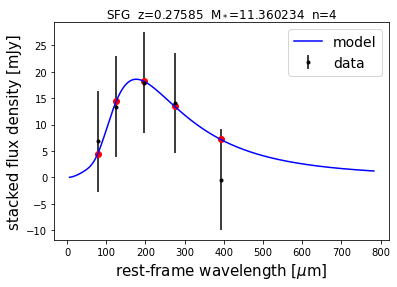

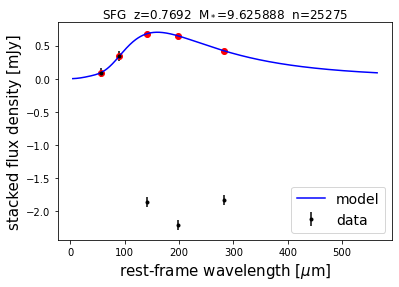

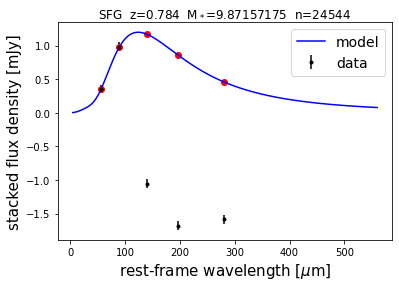

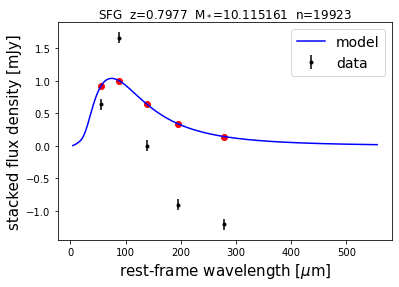

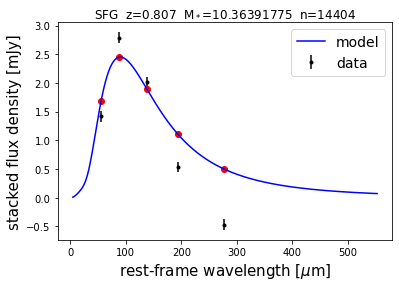

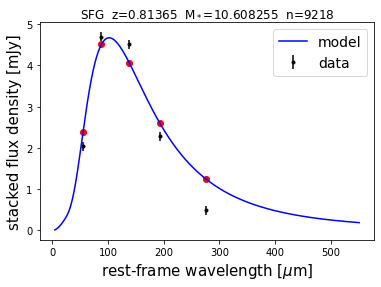

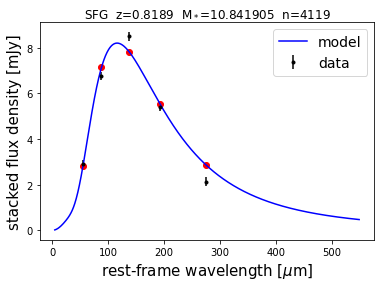

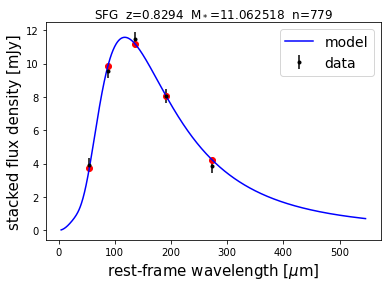

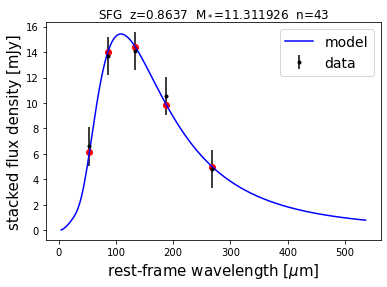

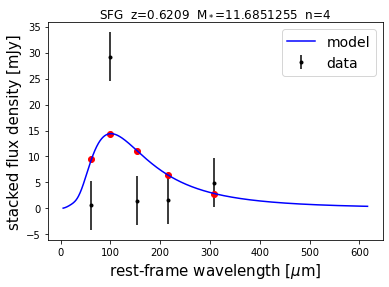

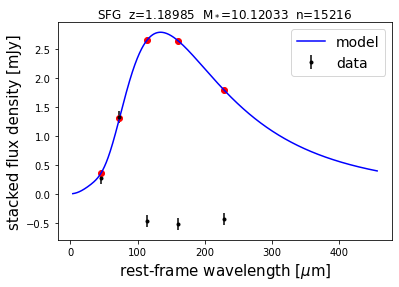

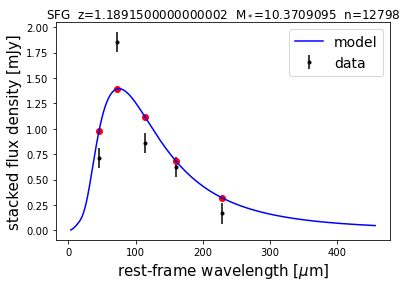

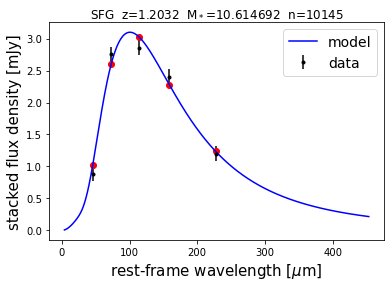

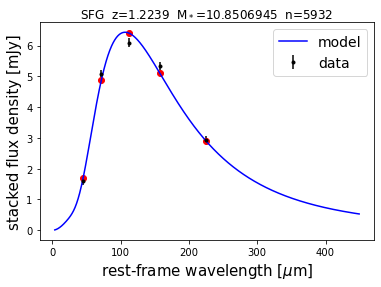

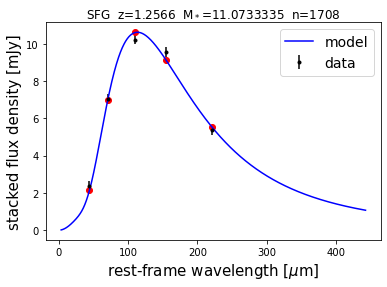

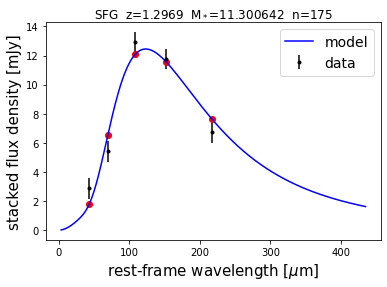

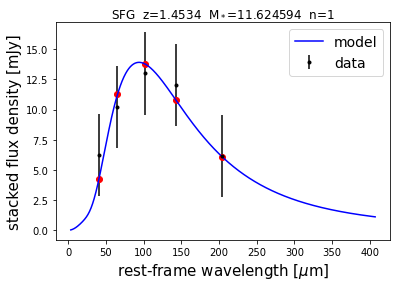

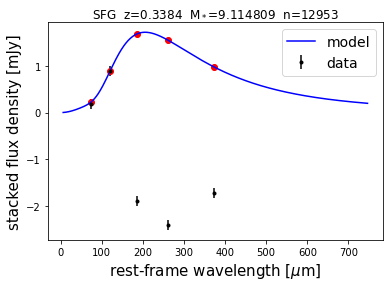

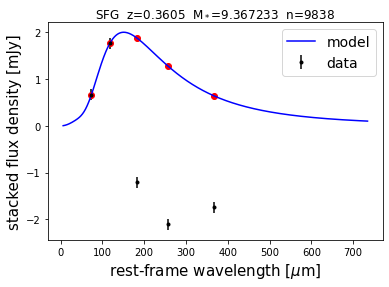

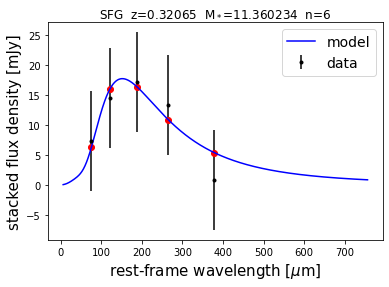

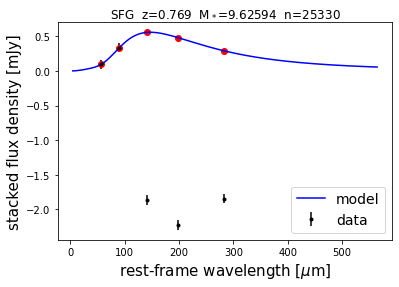

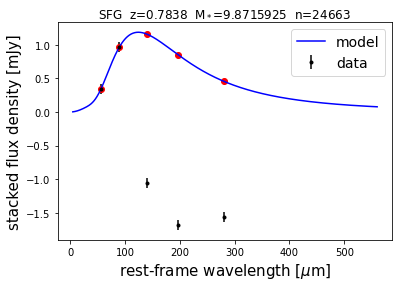

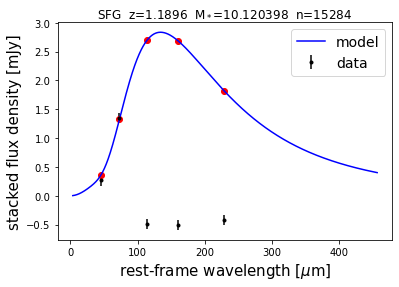

In [83]:
for n in bad_list:
    x = np.array([100.,160.,250.,350.,500.])
    y = np.array([results.loc[n,'100_flux(mJy)'],results.loc[n,'160_flux(mJy)'],results.loc[n,'250_flux(mJy)'],results.loc[n,'350_flux(mJy)'],results.loc[n,'500_flux(mJy)']])
    yerr = np.array([results.loc[n,'100_std(mJy)'],results.loc[n,'160_std(mJy)'],results.loc[n,'250_std(mJy)'],results.loc[n,'350_std(mJy)'],results.loc[n,'500_std(mJy)']])
    z = results.loc[n,'Median_redshift']
    x_new = np.arange(8,1000)
    plt.errorbar(x/(1+z), y, yerr=yerr, fmt=".k", capsize=0, label="data")
    plt.plot(x/(1+z),model((results.loc[n,'Tdust'],results.loc[n,'Norm']),x/(1+z))*10**3, "or")
    plt.plot(x_new/(1+z),model((results.loc[n,'Tdust'],results.loc[n,'Norm']),x_new/(1+z))*10**3, "b", label="model")
    plt.legend(fontsize=14)
    #plt.xlim(0, 1000)
    plt.title(results.loc[n,'Type']+'  z='+str(results.loc[n,'Median_redshift'])+'  M$_*$='+str(results.loc[n,'Median_mass'])+'  n='+str(results.loc[n,'Count']))
    plt.xlabel("rest-frame wavelength [$\mu$m]",size=15)
    plt.ylabel("stacked flux density [mJy]",size=15)
    plt.show()
    plt.close()

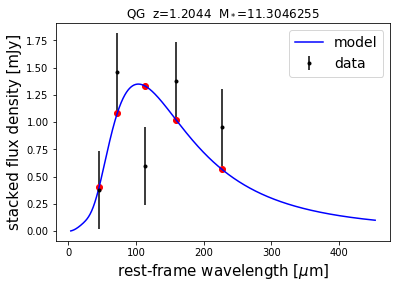

In [41]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[65,'100_flux(mJy)'],results.loc[65,'160_flux(mJy)'],results.loc[65,'250_flux(mJy)'],results.loc[65,'350_flux(mJy)'],results.loc[65,'500_flux(mJy)']])
yerr = np.array([results.loc[65,'100_std(mJy)'],results.loc[65,'160_std(mJy)'],results.loc[65,'250_std(mJy)'],results.loc[65,'350_std(mJy)'],results.loc[65,'500_std(mJy)']])
z = results.loc[65,'Median_redshift']

x_new = np.arange(8,1000)
plt.errorbar(x/(1+z), y, yerr=yerr, fmt=".k", capsize=0, label="data")
plt.plot(x/(1+z),model((results.loc[65,'Tdust'],results.loc[65,'Norm']),x/(1+z))*10**3, "or")
plt.plot(x_new/(1+z),model((results.loc[65,'Tdust'],results.loc[65,'Norm']),x_new/(1+z))*10**3, "b", label="model")
plt.legend(fontsize=14)
#plt.xlim(0, 1000)
plt.title(results.loc[65,'Type']+'  z='+str(results.loc[65,'Median_redshift'])+'  M$_*$='+str(results.loc[65,'Median_mass']))
plt.xlabel("rest-frame wavelength [$\mu$m]",size=15)
plt.ylabel("stacked flux density [mJy]",size=15);

In [78]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[16,'100_flux(mJy)'],results_1.loc[16,'160_flux(mJy)'],results_1.loc[16,'250_flux(mJy)'],results_1.loc[16,'350_flux(mJy)'],results_1.loc[16,'500_flux(mJy)']])
yerr = np.array([results_1.loc[16,'100_std(mJy)'],results_1.loc[16,'160_std(mJy)'],results_1.loc[16,'250_std(mJy)'],results_1.loc[16,'350_std(mJy)'],results_1.loc[16,'500_std(mJy)']])
initial = np.array([results_1.loc[16,'Tdust'],results_1.loc[16,'Norm']])
initial

array([3.00523876e+01, 1.28332979e+06])

In [102]:
ndim = len(initial)
nwalkers = 32
p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x/1.55, y/1000, yerr/1000))
sampler.run_mcmc(p0, 5000, progress=True);

100%|██████████| 5000/5000 [00:29<00:00, 171.72it/s]


In [114]:
tau = sampler.get_autocorr_time()
print(tau)

flat_samples = sampler.get_chain(discard=np.floor(tau[0]*3).astype(int), thin=np.floor(tau[0]/2).astype(int), flat=True)
print(flat_samples.shape)

(9792, 2)


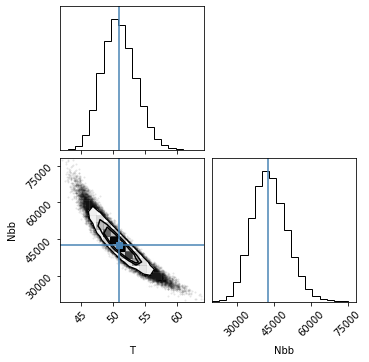

In [54]:
fig = corner.corner(
    flat_samples, labels=labels, truths=[results_1.loc[14,'Tdust'],results_1.loc[14,'Norm']]
);

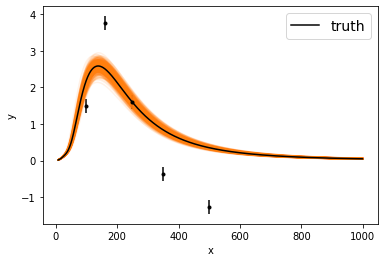

In [64]:
inds = np.random.randint(len(flat_samples), size=500)
x_new = np.arange(8,1000)
for ind in inds:
    sample = flat_samples[ind]
    #print(sample)
    plt.plot(x_new, model(([sample[0],sample[1]]),x_new/1.55)*1000, "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k")#, capsize=0)
plt.plot(x_new,model((results_1.loc[14,'Tdust'],results_1.loc[14,'Norm']),x_new/1.55)*1000, "k", label="truth")
plt.legend(fontsize=14,loc='upper right')
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [61]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[74,'100_flux(mJy)'],results.loc[74,'160_flux(mJy)'],results.loc[74,'250_flux(mJy)'],results.loc[74,'350_flux(mJy)'],results.loc[74,'500_flux(mJy)']])
yerr = np.array([results.loc[74,'100_std(mJy)'],results.loc[74,'160_std(mJy)'],results.loc[74,'250_std(mJy)'],results.loc[74,'350_std(mJy)'],results.loc[74,'500_std(mJy)']])
#initial = np.array([results.loc[74,'Tdust'],results.loc[74,'Norm']])
initial = np.array([30,10**4])
initial

array([   30, 10000])

In [35]:
ndim = len(initial)
nwalkers = 64
p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x/(1+results.loc[74,'Median_redshift']), y/1000, yerr/1000))
sampler.run_mcmc(p0, 30000, progress=True);

  0%|          | 88/30000 [00:00<05:10, 96.25it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
  1%|▏         | 388/30000 [00:04<05:30, 89.69it/s] /home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
 25%|██▌       | 7553/30000 [01:05<03:02, 123.13it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 25%|██▌       | 7566/30000 [01:05<03:05, 120.93it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
 25%|██▌       | 7630/30000 [01:05<03:06, 119.91it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

ValueError: At least one parameter value was infinite

/home/bruno/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2039: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


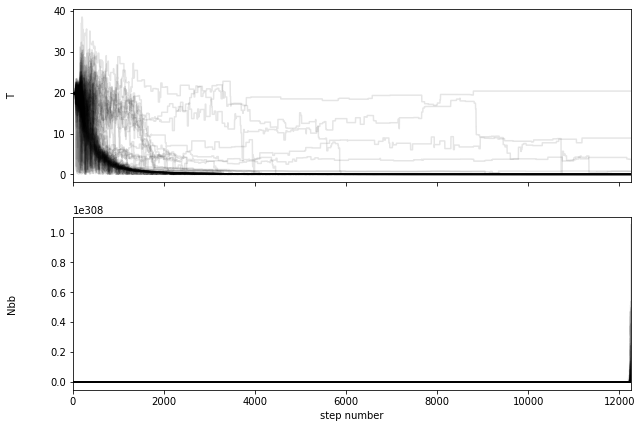

In [33]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["T", "Nbb"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.1)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [37]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[65,'100_flux(mJy)'],results.loc[65,'160_flux(mJy)'],results.loc[65,'250_flux(mJy)'],results.loc[65,'350_flux(mJy)'],results.loc[65,'500_flux(mJy)']])
yerr = np.array([results.loc[65,'100_std(mJy)'],results.loc[65,'160_std(mJy)'],results.loc[65,'250_std(mJy)'],results.loc[65,'350_std(mJy)'],results.loc[65,'500_std(mJy)']])
#initial = np.array([results.loc[65,'Tdust'],results.loc[65,'Norm']])
initial = np.array([30,10**4])
initial

array([   30, 10000])

In [38]:
ndim = len(initial)
nwalkers = 64
p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x/(1+results.loc[65,'Median_redshift']), y/1000, yerr/1000))
sampler.run_mcmc(p0, 30000, progress=True);

  0%|          | 67/30000 [00:00<05:24, 92.33it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
  4%|▍         | 1320/30000 [00:14<04:35, 104.02it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
100%|██████████| 30000/30000 [04:49<00:00, 103.47it/s]


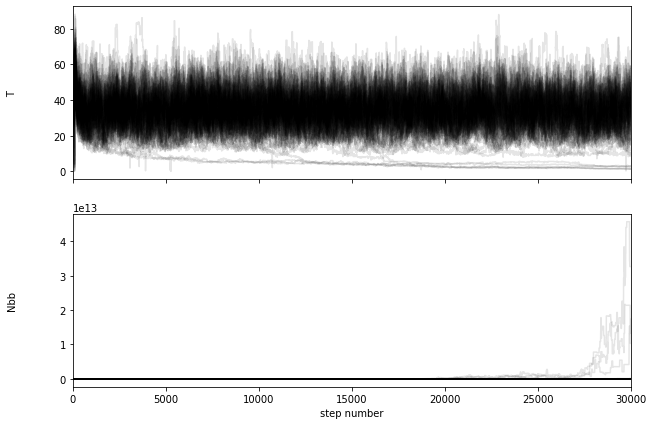

In [39]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["T", "Nbb"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.1)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [42]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 600;
tau: [830.24786843 863.81133633]

In [43]:
flat_samples = sampler.get_chain(flat=True)
print(flat_samples.shape)

(1920000, 2)


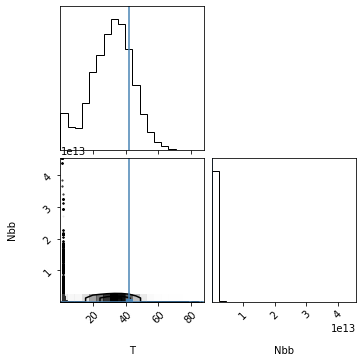

In [44]:
fig = corner.corner(
    flat_samples, labels=labels, truths=[results.loc[65,'Tdust'],results.loc[65,'Norm']]
);

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: R

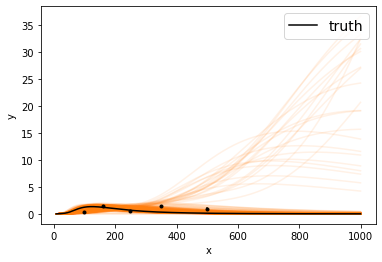

In [46]:
inds = np.random.randint(len(flat_samples), size=500)
x_new = np.arange(8,1000)
for ind in inds:
    sample = flat_samples[ind]
    #print(sample)
    plt.plot(x_new, model(([sample[0],sample[1]]),x_new/results.loc[65,'Median_redshift'])*1000, "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k")#, capsize=0)
plt.plot(x_new,model((results.loc[65,'Tdust'],results.loc[65,'Norm']),x_new/results.loc[65,'Median_redshift'])*1000, "k", label="truth")
plt.legend(fontsize=14,loc='upper right')
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [47]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [95]:
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,Tdust,Norm,LIR_H,SFR_H,LIR8_median,LIR40_median,SFR8_median,SFR40_median,SFR8_upper,SFR40_upper
0,IRBQG,9.9 - 10.4,10.188737,0.5 - 1.0,0.73290,1,1.852234,3.827418e-16,-8.015293,0.000000e+00,...,32.880815,1.233539e+06,11.591895,39.629427,NaN,NaN,NaN,NaN,NaN,NaN
1,IRBQG,10.2 - 10.7,10.434191,0.5 - 1.0,0.70760,1,0.702044,1.913709e-16,-4.270449,8.673617e-16,...,9.878703,-8.404093e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IRBQG,10.2 - 10.7,10.289956,1.0 - 1.5,1.42520,5,0.043691,5.335709e-02,4.001256,8.333744e+00,...,30.391887,1.741927e+06,12.312093,208.073402,NaN,NaN,NaN,NaN,NaN,NaN
3,IRBQG,10.5 - 11.0,10.551246,0.5 - 1.0,0.83860,2,0.041980,6.070640e-02,11.881541,6.493317e+00,...,60.599638,1.777646e+05,11.905613,81.608598,12.030013,11.871073,108.676709,75.369792,4.345209e+01,2.233015e+01
4,IRBQG,10.5 - 11.0,10.690874,1.0 - 1.5,1.43720,26,0.070858,1.835444e-02,-0.538877,1.606186e+00,...,27.933458,1.194032e+06,12.001584,101.790535,12.070972,11.998185,119.424920,100.996942,1.430886e+01,1.088016e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,SFG,11.7 - 12.2,11.909817,0.0 - 0.5,0.40550,1,0.081672,1.196068e-17,-3.662153,2.168404e-15,...,23.132104,1.039167e+06,10.242778,1.773784,10.307581,10.242803,2.059226,1.773886,1.384705e-08,1.174708e-08
72,SFG,11.7 - 12.2,11.735640,0.5 - 1.0,0.67935,2,-0.005447,4.132612e-02,8.119149,4.968157e+00,...,60.319903,1.847121e+05,11.691017,49.789786,11.838729,11.672239,69.960373,47.682864,2.289963e+01,9.446658e+00
73,SFG,11.7 - 12.2,11.976331,1.0 - 1.5,1.34960,1,-0.160029,4.784272e-17,11.325651,1.734723e-15,...,60.119111,-9.571424e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,SFG,12.0 - 12.5,12.235741,1.0 - 1.5,1.42760,2,-0.048626,2.108978e-02,-8.485049,6.249148e+00,...,73.411269,-1.015171e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
results.loc[(results['Type']=='QG')&(results['Median_mass']>11),['Type','Mass_range','Redshift_range','Count','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H','SFR8_median','Radio_detected']]

,Type,Mass_range,Redshift_range,Count,500_flux(mJy),Tdust,Norm,LIR_H,SFR_H,SFR8_median,Radio_detected
57,QG,10.95 - 11.1,0.0 - 0.5,620,-1.052853,161.577553,5.714438e+02,9.773397,0.601894,NaN,44
58,QG,10.95 - 11.1,0.5 - 1.0,3393,-0.322518,52.299401,1.149238e+04,10.409613,2.604570,3.454631,125
59,QG,10.95 - 11.1,1.0 - 1.5,3721,0.104220,64.797641,4.102281e+03,10.725787,5.393984,7.641644,73
60,QG,11.1 - 11.25,0.0 - 0.5,298,-1.746246,205.282586,5.604919e+02,9.956802,0.918175,NaN,29
61,QG,11.1 - 11.25,0.5 - 1.0,1850,0.158927,58.924311,1.172492e+04,10.594759,3.989170,5.493735,142
62,QG,11.1 - 11.25,1.0 - 1.5,2242,1.553499,19.458915,7.306496e+05,10.895673,7.976209,8.724457,92
63,QG,11.25 - 11.4,0.0 - 0.5,128,-3.260029,21.045306,-1.627315e+06,NaN,NaN,NaN,7
64,QG,11.25 - 11.4,0.5 - 1.0,663,-0.515899,74.736180,7.094695e+03,10.722320,5.351101,7.482241,78
65,QG,11.25 - 11.4,1.0 - 1.5,913,0.951181,41.907686,4.164839e+04,11.077410,12.120842,NaN,50
66,QG,11.4 - 11.55,0.0 - 0.5,49,0.660265,23.027960,-2.260385e+05,NaN,NaN,NaN,1


In [24]:
results.loc[(results['Type']=='SFG')&(results['Median_mass']>11),['Type','Mass_range','Redshift_range','Count','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H','SFR8_median','Radio_detected']]

,Type,Mass_range,Redshift_range,Count,500_flux(mJy),Tdust,Norm,LIR_H,SFR_H,SFR8_median,Radio_detected
119,SFG,10.95 - 11.1,0.5 - 1.0,1409,3.196442,34.142603,6.351350e+05,11.491066,31.418750,38.513489,345
120,SFG,10.95 - 11.1,1.0 - 1.5,2304,4.472415,38.295619,3.769861e+05,11.908551,82.162639,102.954792,375
121,SFG,11.1 - 11.25,0.0 - 0.5,41,3.831743,31.135886,1.396605e+06,10.925271,8.538742,10.029227,14
122,SFG,11.1 - 11.25,0.5 - 1.0,406,4.630212,35.765087,6.996370e+05,11.631737,43.437036,53.470375,136
123,SFG,11.1 - 11.25,1.0 - 1.5,953,6.058775,35.810815,6.393721e+05,12.039437,111.060561,136.851535,249
124,SFG,11.25 - 11.4,0.0 - 0.5,3,-0.400226,21.188687,5.365282e+06,10.413937,2.630634,2.586886,1
125,SFG,11.25 - 11.4,0.5 - 1.0,78,4.185673,38.506220,6.117530e+05,11.718964,53.099034,65.473526,30
126,SFG,11.25 - 11.4,1.0 - 1.5,259,5.968316,34.428235,7.070500e+05,12.035868,110.151726,133.954177,85
127,SFG,11.4 - 11.55,0.0 - 0.5,3,-1.713526,30.376021,1.897994e+06,10.895269,7.968780,NaN,0
128,SFG,11.4 - 11.55,0.5 - 1.0,7,14.358230,39.205284,9.206017e+05,11.919303,84.222074,NaN,1


In [93]:
results.loc[74,'LIR8_median'], results.loc[74,'LIR40_median'], results.loc[74,'SFR8_median'], results.loc[74,'SFR40_median'], results.loc[74,'SFR8_upper'], results.loc[74,'SFR40_upper'] = SFR_MCMC(results.loc[74,'Median_redshift'],results.loc[74,'Tdust'],results.loc[74,'Norm'],results.loc[74,'100_flux(mJy)'],results.loc[74,'160_flux(mJy)'],results.loc[74,'250_flux(mJy)'],results.loc[74,'350_flux(mJy)'],results.loc[74,'500_flux(mJy)'],results.loc[74,'100_std(mJy)'],results.loc[74,'160_std(mJy)'],results.loc[74,'250_std(mJy)'],results.loc[74,'350_std(mJy)'],results.loc[74,'500_std(mJy)'])

  0%|          | 0/30000 [00:00<?, ?it/s]

Initial values:  [1.98119232e+01 3.96376580e+06]


  0%|          | 97/30000 [00:01<06:42, 74.24it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
  2%|▏         | 695/30000 [00:07<04:29, 108.56it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
 26%|██▌       | 7674/30000 [01:04<03:18, 112.61it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
 26%|██▌       | 7698/30000 [01:04<03:25, 108.72it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 26%|██▌       | 7758/30000 [01:05<03:17, 112.67it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

ValueError: At least one parameter value was infinite

In [101]:
results['SFR8_ratio']=results['SFR_lofar']/results['SFR8_median']
results['SFR8_ratio_unc']=np.sqrt( (results['SFR8_ratio']**2)*((results['SFR_lofar_unc']/results['SFR_lofar'])**2 + (results['SFR8_upper']/results['SFR8_median'])**2) )
results['SFR40_ratio']=results['SFR_lofar']/results['SFR40_median']
results['SFR40_ratio_unc']=np.sqrt( (results['SFR40_ratio']**2)*((results['SFR_lofar_unc']/results['SFR_lofar'])**2 + (results['SFR40_upper']/results['SFR40_median'])**2) )

In [79]:
results.loc[results['Type']=='SFG',['Type','Median_mass','Count','100_flux(mJy)','160_flux(mJy)','250_flux(mJy)','350_flux(mJy)','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H']]

,Type,Median_mass,Count,100_flux(mJy),160_flux(mJy),250_flux(mJy),350_flux(mJy),500_flux(mJy),Tdust,Norm,LIR_H,SFR_H
34,SFG,7.313531,5245,-0.215213,-0.119695,-3.123322,-3.328230,-2.505588,11.387401,-1.359816e+07,NaN,NaN
35,SFG,7.395454,23,-1.603481,-3.979781,-2.814502,-2.986657,-3.450749,27.355017,-5.666048e+05,NaN,NaN
36,SFG,7.395524,1,-13.893229,-2.239126,-6.910786,-5.400008,-1.157762,248.255768,-3.453653e+03,NaN,NaN
37,SFG,7.813471,15474,-0.003861,-0.360550,-3.443856,-3.719418,-2.949751,11.782361,-1.338482e+07,NaN,NaN
38,SFG,7.864479,248,-0.241653,-3.320152,-4.318962,-5.024062,-3.824348,20.574197,-2.034956e+06,NaN,NaN
39,SFG,7.920468,68,-0.590137,-5.119051,-3.907211,-3.959586,-2.109997,43.548864,-1.329965e+05,NaN,NaN
40,SFG,8.283108,35025,-0.293177,-0.371848,-3.422526,-3.720376,-2.770338,12.809492,-9.327798e+06,NaN,NaN
41,SFG,8.386322,3093,-0.665982,-0.223288,-3.622995,-3.607883,-2.645434,16.806804,-3.103386e+06,NaN,NaN
42,SFG,8.364944,677,-0.327083,-1.376020,-4.282685,-4.317771,-2.973690,28.545819,-5.076226e+05,NaN,NaN
43,SFG,8.727292,37347,-0.033750,-0.054283,-2.723136,-3.044907,-2.259668,12.795738,-7.536576e+06,NaN,NaN


In [49]:
results.loc[results['Type']=='QG',['Type','Median_mass','Count','100_flux(mJy)','160_flux(mJy)','250_flux(mJy)','350_flux(mJy)','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H']]

,Type,Median_mass,Count,100_flux(mJy),160_flux(mJy),250_flux(mJy),350_flux(mJy),500_flux(mJy),Tdust,Norm,LIR_H,SFR_H
7,QG,7.396254,25,2.142651,-0.918384,-1.450049,-2.196473,-1.760863,9.903583,-1.519727e+07,NaN,NaN
8,QG,7.878830,566,-0.469347,-1.548605,-4.205962,-4.225476,-3.127843,12.355275,-1.295639e+07,NaN,NaN
9,QG,8.330666,3459,-0.713437,-1.399611,-4.386699,-4.398244,-3.264557,12.610062,-1.236289e+07,NaN,NaN
10,QG,8.418305,5,7.485112,16.293940,10.316931,3.798884,-3.188293,44.782064,3.349559e+05,11.445926,28.317136
11,QG,8.774096,8196,-0.506248,-0.718568,-3.629884,-3.835489,-2.769702,12.509793,-1.070814e+07,NaN,NaN
12,QG,8.900928,103,-0.107663,2.501810,-4.109107,-4.473516,-4.037006,13.431518,-9.499821e+06,NaN,NaN
13,QG,8.873606,12,6.327036,8.191111,-3.981578,-6.227388,-7.100859,15.705466,-7.650154e+06,NaN,NaN
14,QG,9.222692,7540,-0.229001,-0.304992,-3.031185,-3.254304,-2.298415,12.417690,-9.164839e+06,NaN,NaN
15,QG,9.300395,836,-0.617940,0.743344,-2.730223,-3.115373,-2.246494,15.305761,-3.636780e+06,NaN,NaN
16,QG,9.363929,54,-1.372976,2.851619,-2.966707,-4.639767,-4.056477,18.010624,-2.903216e+06,NaN,NaN


In [46]:
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,Tdust,Norm,LIR_H,SFR_H,LIR_median,SFR_median,SFR_lower,SFR_upper,SFR_ratio,SFR_ratio_unc
0,IRBQG,10.0 - 10.5,10.311464,0.5 - 1.0,0.72025,2,1.271388,0.400879,-6.064229,1.345327e+00,...,33.634575,3.221080e+05,11.117570,13.295151,11.104009,12.886405,2.701709e+00,2.678260e+00,10.393801,3.795748
1,IRBQG,10.0 - 10.5,10.289956,1.0 - 1.5,1.42520,5,0.047322,0.054105,4.937750,7.496409e+00,...,34.254224,1.203903e+06,12.455823,289.698417,NaN,NaN,NaN,NaN,NaN,NaN
2,IRBQG,10.5 - 11.0,10.856100,0.5 - 1.0,0.87890,6,0.421667,0.638868,11.739993,1.294989e+01,...,43.350520,7.910085e+05,12.185842,155.583906,NaN,NaN,NaN,NaN,NaN,NaN
3,IRBQG,10.5 - 11.0,10.800099,1.0 - 1.5,1.42400,53,0.105144,0.017524,-0.939651,1.658360e+00,...,29.926517,8.600684e+05,12.055358,115.207692,12.040085,111.226523,1.741421e+01,1.929039e+01,0.560091,0.132476
4,IRBQG,11.0 - 11.5,11.072286,0.5 - 1.0,0.91260,7,0.279690,0.314955,5.715042,5.511290e+00,...,28.370336,1.893867e+06,11.818673,66.802953,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SFG,11.0 - 11.5,11.094974,1.0 - 1.5,1.25350,2621,0.193899,0.003021,2.470076,2.340020e-01,...,36.259729,5.400867e+05,12.075225,120.600254,12.074674,120.447313,2.501175e+00,2.340716e+00,0.684602,0.028638
61,SFG,11.5 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,0.000000,-3.662153,8.673617e-16,...,23.132104,1.039167e+06,10.307555,2.059103,10.307581,2.059226,1.538653e-08,1.560557e-08,1.312307,0.024424
62,SFG,11.5 - 12.0,11.644589,0.5 - 1.0,0.66600,5,0.103941,0.184998,1.221876,4.677406e+00,...,45.643185,3.048674e+05,11.568974,37.592118,NaN,NaN,NaN,NaN,NaN,NaN
63,SFG,11.5 - 12.0,11.591896,1.0 - 1.5,1.34910,11,0.533296,0.203545,5.848268,2.754533e+00,...,37.820399,4.900343e+05,12.189515,156.905335,12.147539,142.449788,2.975087e+01,3.947017e+01,1.788583,0.816820


In [103]:
results.to_csv(path+"Bootes/Bootes_stack_full_results_NDWFS_3.csv",index=False)

# OLDER PLOTS
#### These plots are not currently in use, but may prove helpful in the future

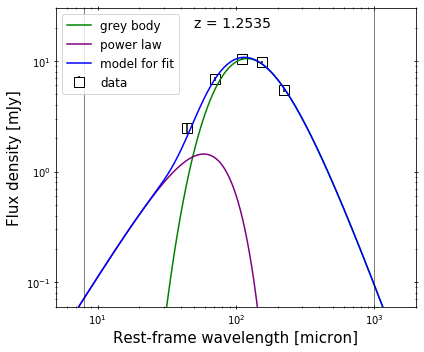

In [139]:
def Greybody(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for dust-dominated FIR regime
    given by an optically thick grey-body model
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    beta = 1.5
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1)
    return flux

def PL(x,Lc,Npl):
    '''Flux density in Jy at wavelength x in micron
    for PAH-dominated MIR regime
    given by a power-law
    Lc is the turnover wavelength 
    Nbl is a normalization parameter'''
    alpha = 2.0
    #flux = Npl*np.exp(-(x/(Lc*3/4))**2)*(x/Lc)**alpha
    flux = Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

T = results.loc[60,'Tdust']
alpha = 2.0
beta = 1.5
Lc = (26.6764 + alpha*6.24629)**-2 + (1.9053*(10**-4) + alpha*7.24277*(10**-5))*T # 1/turnover_wavelength
Npl = results.loc[60,'Norm']*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)

x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[60,'100_flux(mJy)'],results.loc[60,'160_flux(mJy)'],results.loc[60,'250_flux(mJy)'],results.loc[60,'350_flux(mJy)'],results.loc[60,'500_flux(mJy)']])
yerr = np.array([results.loc[60,'100_std(mJy)'],results.loc[60,'160_std(mJy)'],results.loc[60,'250_std(mJy)'],results.loc[60,'350_std(mJy)'],results.loc[60,'500_std(mJy)']])
x_new = np.arange(8,5000)
z = results.loc[60,'Median_redshift']

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x_new/(1+z),Greybody(x_new/(1+z),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "g", label="grey body")
ax.plot(x_new/(1+z),PL(x_new/(1+z),Lc,Npl)*10**3,"purple",label='power law')
ax.plot(x_new/(1+z),GreybodyPL(x_new/(1+z),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "b", label="model for fit")
ax.errorbar(x/(1+z), y, yerr=yerr,fmt='s',mfc='w',mec='k',ms=10,ecolor='k',barsabove=True,capsize=0,label='data')
ax.axvline(8,0,1,lw=1,c='k',alpha=0.5)
ax.axvline(1000,0,1,lw=1,c='k',alpha=0.5)
ax.text(50,20,f'z = {z}',size=14)
ax.set_xlabel("Rest-frame wavelength [micron]",size=15)
ax.set_ylabel("Flux density [mJy]",size=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=5,xmax=2000)
ax.set_ylim(ymin=0.06,ymax=30)
ax.tick_params(which='both',top=True,right=True,direction='inout')
ax.legend(fontsize=12,loc='upper left')
fig.tight_layout()
plt.show()

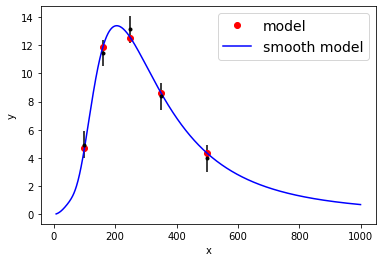

In [75]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[16,'100_flux(mJy)'],results_1.loc[16,'160_flux(mJy)'],results_1.loc[16,'250_flux(mJy)'],results_1.loc[16,'350_flux(mJy)'],results_1.loc[16,'500_flux(mJy)']])
yerr = np.array([results_1.loc[16,'100_std(mJy)'],results_1.loc[16,'160_std(mJy)'],results_1.loc[16,'250_std(mJy)'],results_1.loc[16,'350_std(mJy)'],results_1.loc[16,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x,GreybodyPL(x/(1.55),results_1.loc[16,'Tdust'],results_1.loc[16,'Norm'])*10**3, "or", label="model")
plt.plot(x_new,GreybodyPL(x_new/(1.55),results_1.loc[16,'Tdust'],results_1.loc[16,'Norm'])*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

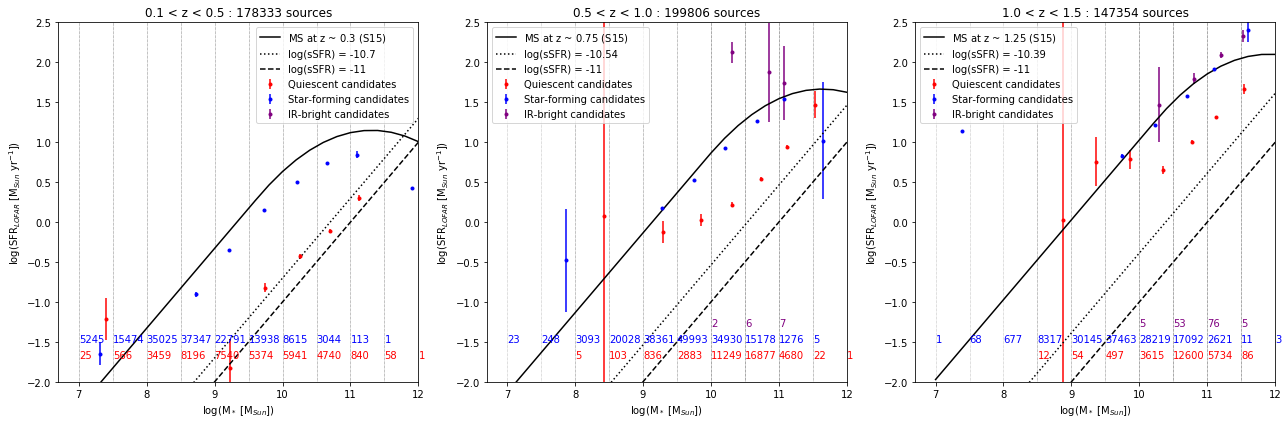

In [48]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age1,age2,age3],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                   data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
                   data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${(za+zb)/2}$ (Speagle 14)')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = data['Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(data['Type'],data['Median_mass'],data['Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

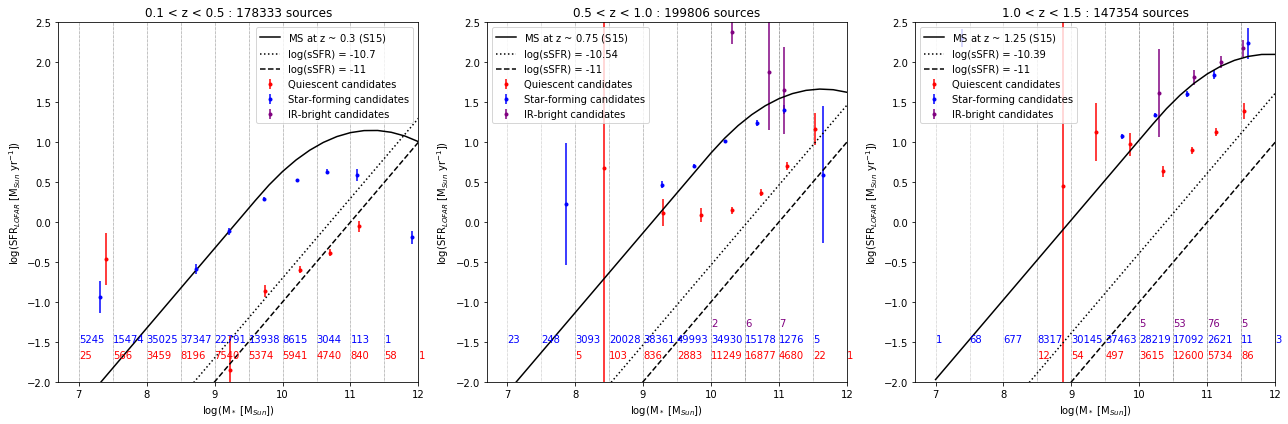

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age1,age2,age3],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']),
                   data.loc[(data['Type']=='SFG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']),
                   data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${(za+zb)/2}$ (Speagle 14)')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = data['Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(data['Type'],data['Median_mass'],data['Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

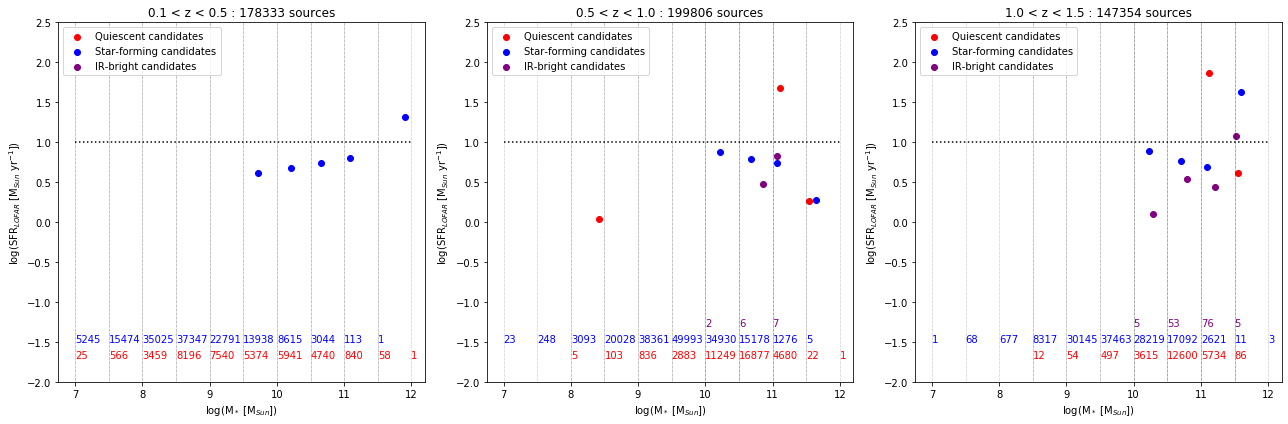

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='purple',label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

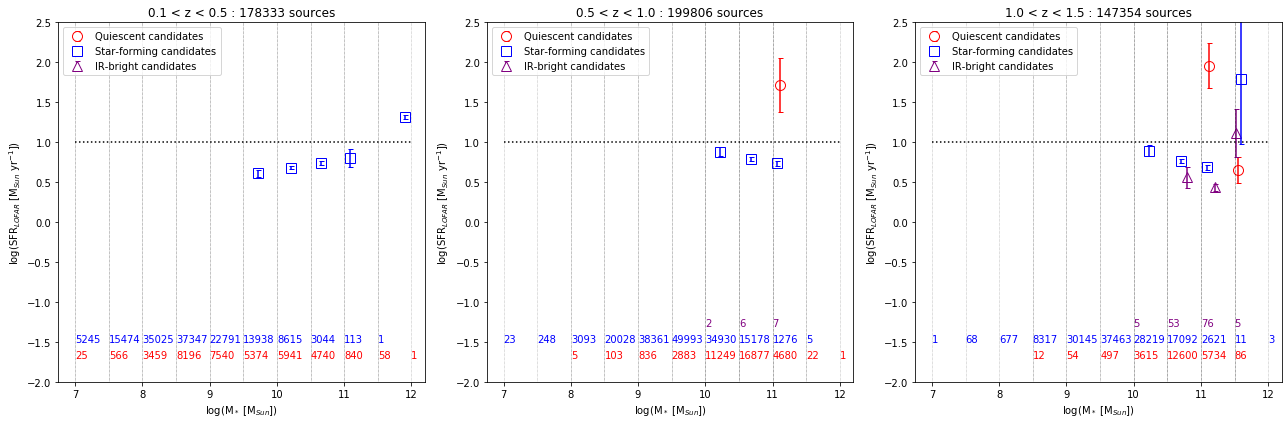

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent candidates')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming candidates')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

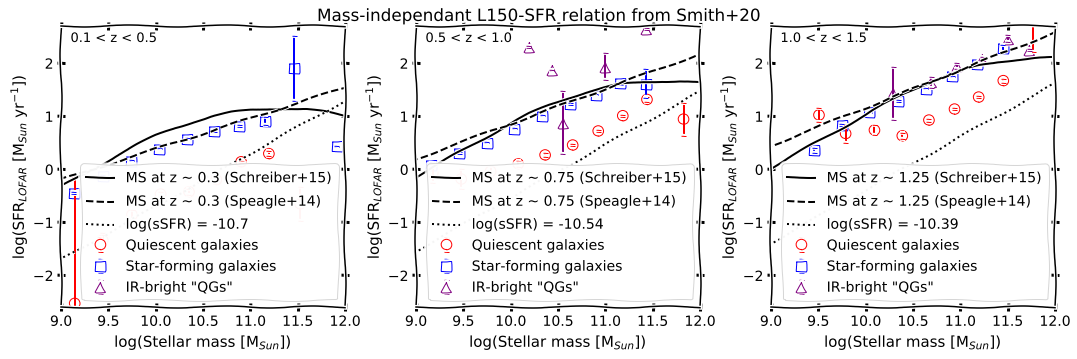

In [18]:
#%% Plotting Star formation rate vs Stellar mass
with plt.xkcd():
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
        z = (za+zb)/2
        logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
        age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
        factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
        data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
        axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
        axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
        axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                       np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                       yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                       fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
        axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                       np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                       yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                       fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
        axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                        np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
                       yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
                       fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright "QGs"')
        axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
        axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
        axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
        count = data['Count'].sum()
        axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
        axs[i].set_ylim(ymin=-2.6,ymax=2.7)
        axs[i].set_xlim(xmin=9,xmax=12.)
        axs[i].tick_params(which='both',top=True,right=True,direction='inout')
        axs[i].legend(numpoints=1, loc='lower right')
    fig.suptitle('Mass-independant L150-SFR relation from Smith+20',y=1)
    fig.tight_layout()
plt.show()